# Table of contents

1. [ Exploratory Data Analysis](#a)\
    1.1 [Dealing with duplicated and missing values](#a1)\
    1.2 [Features' exploration (check distributions) (hist, boxplot)](#a2)\
    1.3 [Check correlation (scatterplot, crosstab)](#a3)
   
    
2. [Data Preparation](#b)


3. [Models](#c)\
    3.1 [Best Model](#c1)\
    3.2 [Linear Regression](#c2)\
    3.3 [Cat Boost Regressor](#c3)\
    3.4 [Light Gradient Boosting Machine](#c4)\
    3.5 [XG Boost Regressor](#c5)\
    3.6 [ARIMA Time Series Forecasting](#d6)\
    3.7 [LSTM Time Series Forecasting](#d7)
    
    
4. [Evaluation](#d)

**Libraries**

In [7]:
import pandas as pd
import statistics

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

<a id='a'></a>
## 1. Exploratory Data Analysis/([to top](#top))

In [709]:
dati = pd.read_csv('./Lake_Bilancino.csv', parse_dates=True)

In [710]:
dati.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [711]:
dati.loc[dati['Rainfall_S_Piero']==0]

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
577,01/01/2004,0.0,0.0,0.4,0.0,0.0,NaN,251.14,0.5
578,02/01/2004,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5
579,03/01/2004,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5
580,04/01/2004,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5
582,06/01/2004,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5
...,...,...,...,...,...,...,...,...,...
6598,26/06/2020,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.6
6599,27/06/2020,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.6
6600,28/06/2020,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.6
6601,29/06/2020,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.6


In [712]:
dati.shape

(6603, 9)

In [713]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


In [714]:
dati.columns

Index(['Date', 'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate'],
      dtype='object')

In [715]:
dati.describe()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,6025.000000,6603.000000,6582.000000
mean,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,249.564091,2.760968
std,6.650012,8.903134,7.166643,7.655847,8.025121,6.944029,2.172558,4.073428
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.310000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,248.000000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.200000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.400000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


In [716]:
dati.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall_S_Piero,6026.0,2.471225,6.650012,0.00,0.0,0.0,0.8,80.60
Rainfall_Mangona,6026.0,3.340657,8.903134,0.00,0.0,0.0,1.4,110.00
Rainfall_S_Agata,6026.0,2.670063,7.166643,0.00,0.0,0.0,1.2,120.20
Rainfall_Cavallina,6026.0,2.674743,7.655847,0.00,0.0,0.0,0.6,113.60
Rainfall_Le_Croci,6026.0,3.129871,8.025121,0.00,0.0,0.0,1.2,88.40
Temperature_Le_Croci,6025.0,14.530141,6.944029,-5.35,9.0,14.5,20.1,34.00
Lake_Level,6603.0,249.564091,2.172558,243.53,248.0,250.2,251.4,252.76
Flow_Rate,6582.0,2.760968,4.073428,0.31,0.6,1.5,3.0,74.65


<a id='a1'></a>
### 1.1 Dealing with duplicated and missing values ([to top](#top))

**Duplicated**

In [717]:
dati.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6598    False
6599    False
6600    False
6601    False
6602    False
Length: 6603, dtype: bool

In [718]:
dati.duplicated().sum()

0

**Null values**

In [719]:
dati.isnull().sum()

Date                      0
Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                21
dtype: int64

In [720]:
dati.isnull().sum().sum()

3484

**Imputo i 21 valori del flow rate mancanti alla media**

In [721]:
dati['Flow_Rate'] = dati['Flow_Rate'].fillna(dati['Flow_Rate'].mean())

In [722]:
dati.isnull().sum()

Date                      0
Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                 0
dtype: int64

**Rimuovo i 578 record senza valori**

In [723]:
dati = dati.dropna() 

In [724]:
dati.isnull().sum()

Date                    0
Rainfall_S_Piero        0
Rainfall_Mangona        0
Rainfall_S_Agata        0
Rainfall_Cavallina      0
Rainfall_Le_Croci       0
Temperature_Le_Croci    0
Lake_Level              0
Flow_Rate               0
dtype: int64

In [725]:
dati.isnull().sum().sum()

0

In [726]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 578 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6025 non-null   object 
 1   Rainfall_S_Piero      6025 non-null   float64
 2   Rainfall_Mangona      6025 non-null   float64
 3   Rainfall_S_Agata      6025 non-null   float64
 4   Rainfall_Cavallina    6025 non-null   float64
 5   Rainfall_Le_Croci     6025 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6025 non-null   float64
 8   Flow_Rate             6025 non-null   float64
dtypes: float64(8), object(1)
memory usage: 470.7+ KB


In [727]:
dati.dtypes

Date                     object
Rainfall_S_Piero        float64
Rainfall_Mangona        float64
Rainfall_S_Agata        float64
Rainfall_Cavallina      float64
Rainfall_Le_Croci       float64
Temperature_Le_Croci    float64
Lake_Level              float64
Flow_Rate               float64
dtype: object

In [728]:
dati.shape

(6025, 9)

In [729]:
dati.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
578,02/01/2004,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5
579,03/01/2004,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5
580,04/01/2004,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5
581,05/01/2004,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5
582,06/01/2004,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5


In [730]:
dati.columns

Index(['Date', 'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate'],
      dtype='object')

In [731]:
dati.describe()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000
mean,2.471635,3.341212,2.670440,2.675187,3.130390,14.530141,249.553472,2.778204
std,6.650488,8.903769,7.167178,7.656404,8.025686,6.944029,2.183334,4.131176
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.450000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,247.930000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.240000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.370000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


In [732]:
dati.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall_S_Piero,6025.0,2.471635,6.650488,0.00,0.00,0.00,0.80,80.60
Rainfall_Mangona,6025.0,3.341212,8.903769,0.00,0.00,0.00,1.40,110.00
Rainfall_S_Agata,6025.0,2.670440,7.167178,0.00,0.00,0.00,1.20,120.20
Rainfall_Cavallina,6025.0,2.675187,7.656404,0.00,0.00,0.00,0.60,113.60
Rainfall_Le_Croci,6025.0,3.130390,8.025686,0.00,0.00,0.00,1.20,88.40
Temperature_Le_Croci,6025.0,14.530141,6.944029,-5.35,9.00,14.50,20.10,34.00
Lake_Level,6025.0,249.553472,2.183334,243.53,247.93,250.24,251.37,252.76
Flow_Rate,6025.0,2.778204,4.131176,0.45,0.60,1.50,3.00,74.65


<a id='b1'></a>
### 1.2 Features' exploration (check distributions) (hist, boxplot) ([to top](#top))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B99BD66408>,
      dtype=object)

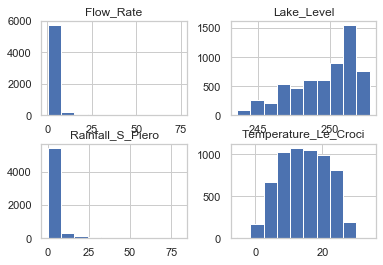

In [857]:
dati.hist()

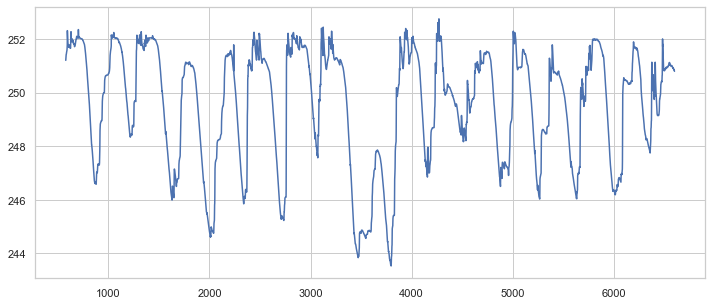

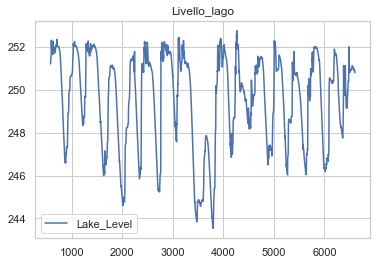

''

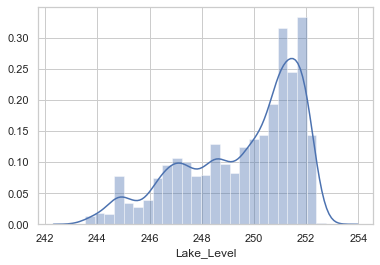

In [734]:
dati['Lake_Level'].plot(figsize=(12,5))

dati[['Lake_Level']].plot()
plt.title("Livello_lago")
plt.show()


g = sns.distplot(dati['Lake_Level'])
;

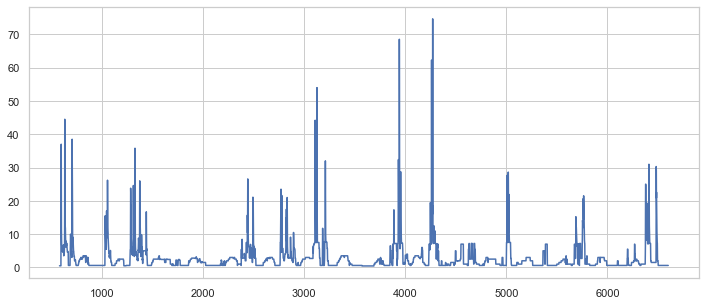

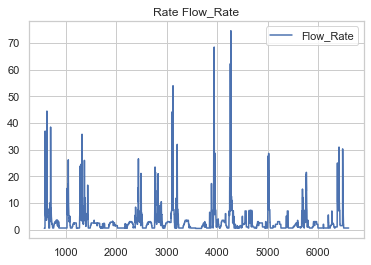

''

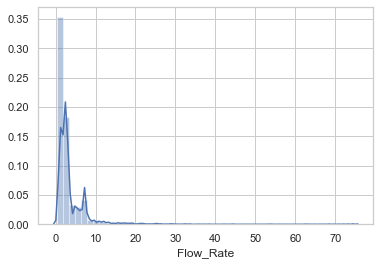

In [735]:
dati['Flow_Rate'].plot(figsize=(12,5))

dati[['Flow_Rate']].plot()
plt.title("Rate Flow_Rate")
plt.show()

g = sns.distplot(dati['Flow_Rate'])
;

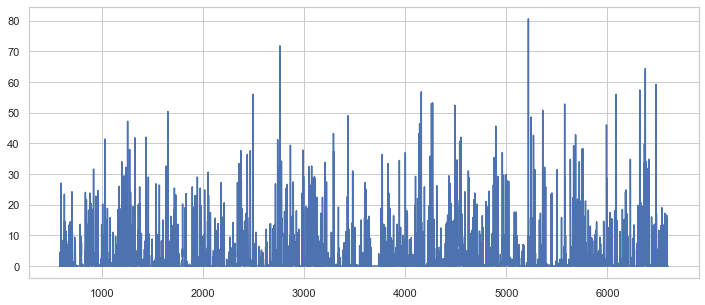

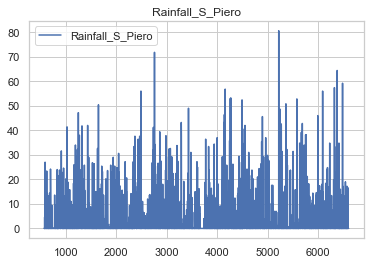

''

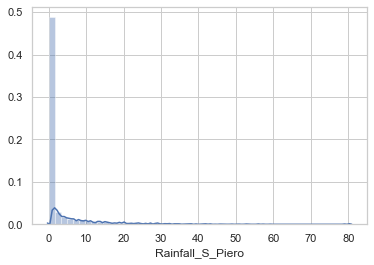

In [736]:
dati['Rainfall_S_Piero'].plot(figsize=(12,5))

dati[['Rainfall_S_Piero']].plot()
plt.title("Rainfall_S_Piero")
plt.show()

g = sns.distplot(dati['Rainfall_S_Piero'])
;

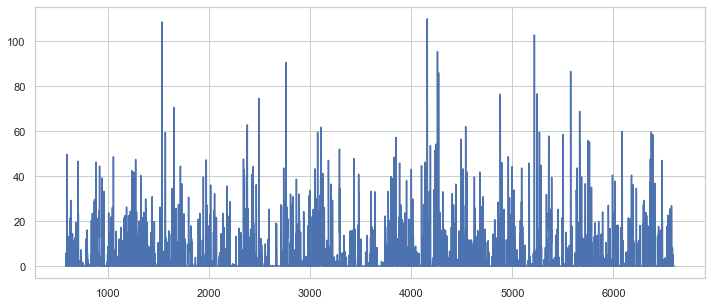

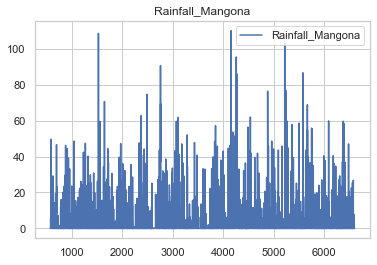

''

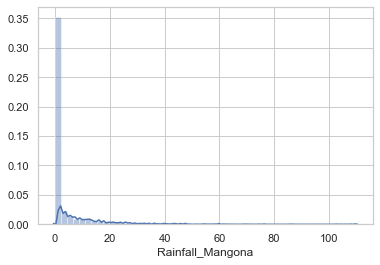

In [737]:
dati['Rainfall_Mangona'].plot(figsize=(12,5))

dati[['Rainfall_Mangona']].plot()
plt.title("Rainfall_Mangona")
plt.show()

g = sns.distplot(dati['Rainfall_Mangona'])
;

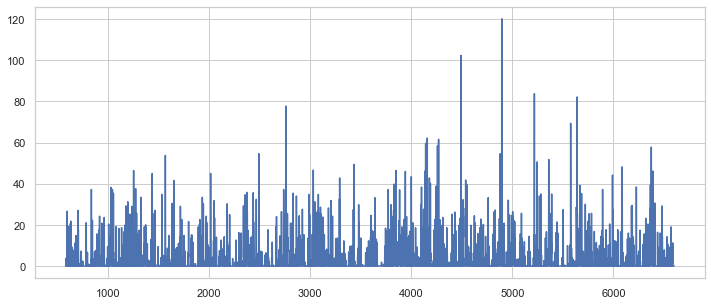

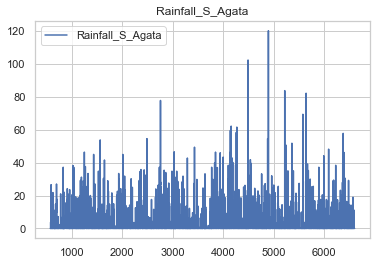

''

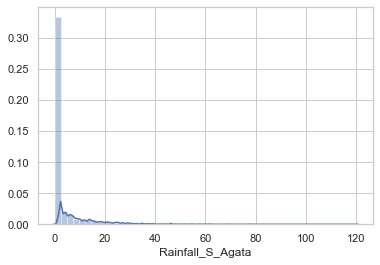

In [738]:
dati['Rainfall_S_Agata'].plot(figsize=(12,5))

dati[['Rainfall_S_Agata']].plot()
plt.title("Rainfall_S_Agata")
plt.show()

g = sns.distplot(dati['Rainfall_S_Agata'])
;

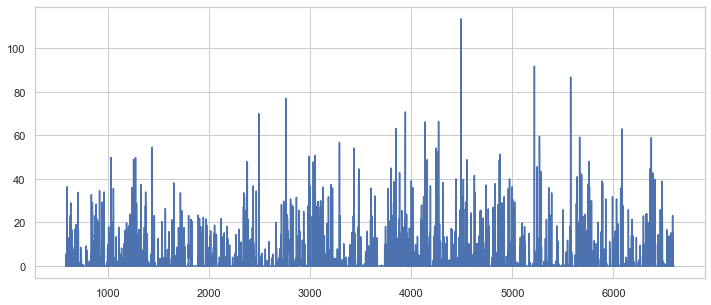

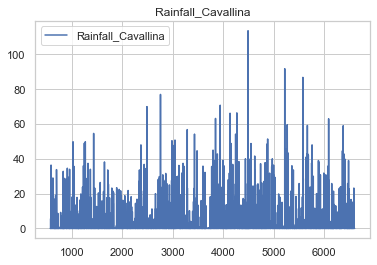

''

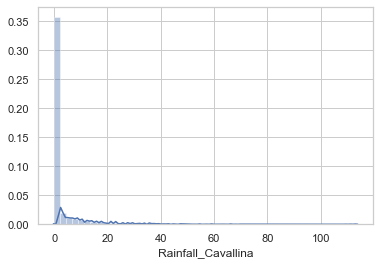

In [739]:
dati['Rainfall_Cavallina'].plot(figsize=(12,5))

dati[['Rainfall_Cavallina']].plot()
plt.title("Rainfall_Cavallina")
plt.show()

g = sns.distplot(dati['Rainfall_Cavallina'])
;

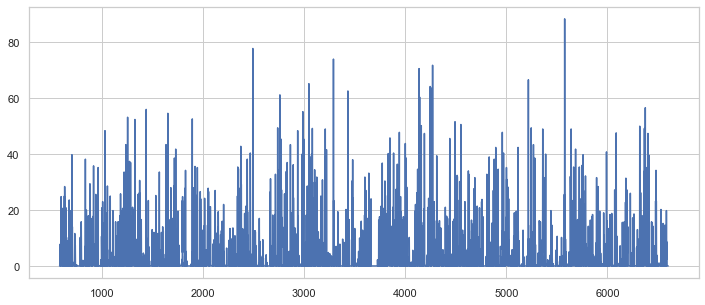

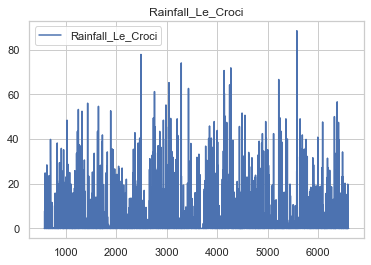

''

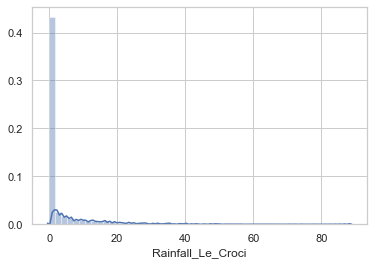

In [740]:
dati['Rainfall_Le_Croci'].plot(figsize=(12,5))

dati[['Rainfall_Le_Croci']].plot()
plt.title("Rainfall_Le_Croci")
plt.show()

g = sns.distplot(dati['Rainfall_Le_Croci'])
;

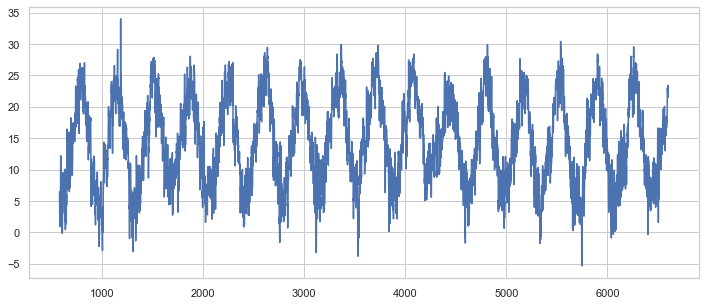

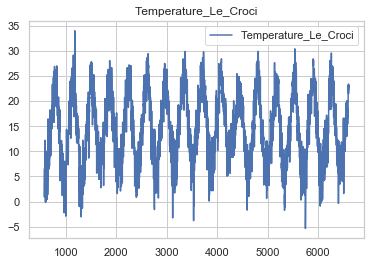

''

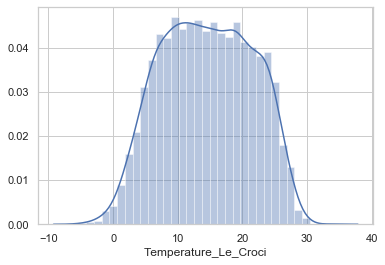

In [741]:
dati['Temperature_Le_Croci'].plot(figsize=(12,5))

dati[['Temperature_Le_Croci']].plot()
plt.title("Temperature_Le_Croci")
plt.show()

g = sns.distplot(dati['Temperature_Le_Croci'])
;



<a id='a3'></a>
### 1.3 Check correlation (scatterplot, crosstab) ([to top](#top))

In [742]:
dati = dati.drop(columns='Date')

In [743]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 578 to 6602
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rainfall_S_Piero      6025 non-null   float64
 1   Rainfall_Mangona      6025 non-null   float64
 2   Rainfall_S_Agata      6025 non-null   float64
 3   Rainfall_Cavallina    6025 non-null   float64
 4   Rainfall_Le_Croci     6025 non-null   float64
 5   Temperature_Le_Croci  6025 non-null   float64
 6   Lake_Level            6025 non-null   float64
 7   Flow_Rate             6025 non-null   float64
dtypes: float64(8)
memory usage: 423.6 KB


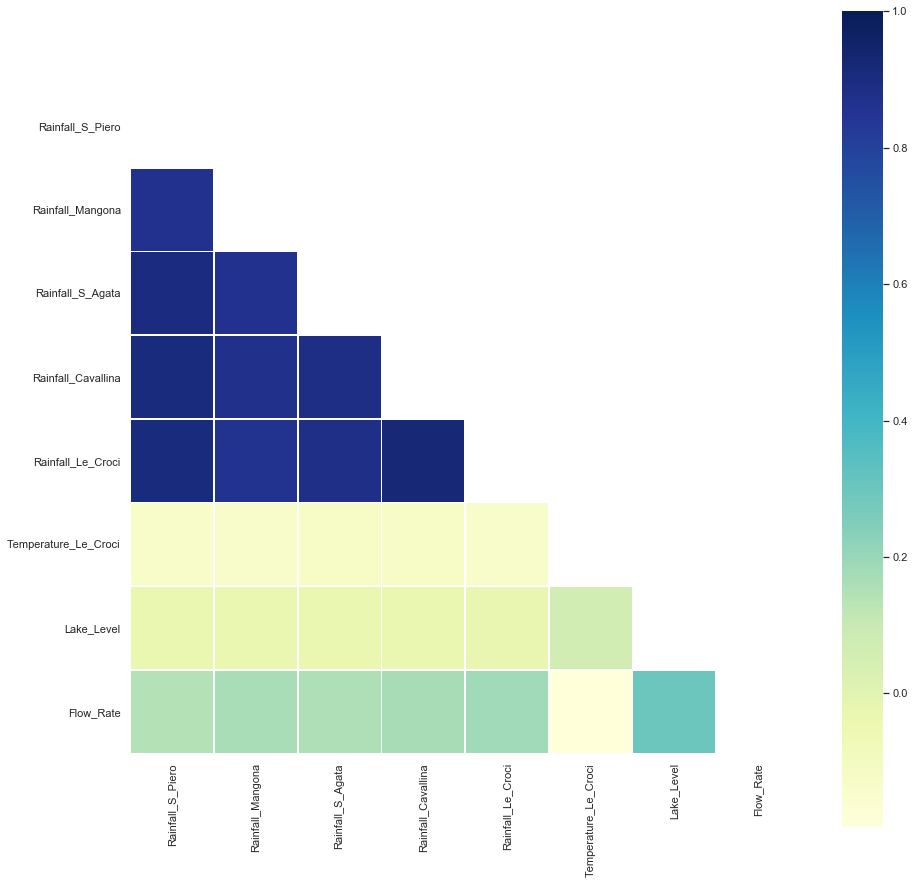

In [744]:
corr = dati.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

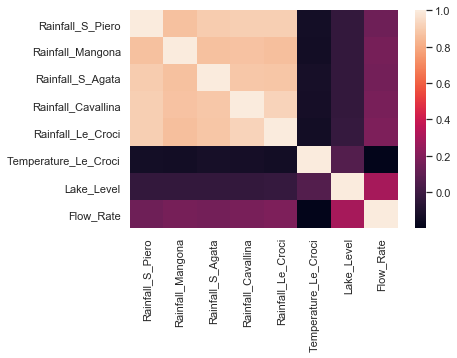

In [745]:
sns.heatmap(corr)

Text(0.5, 1, 'Correlation Heatmap')

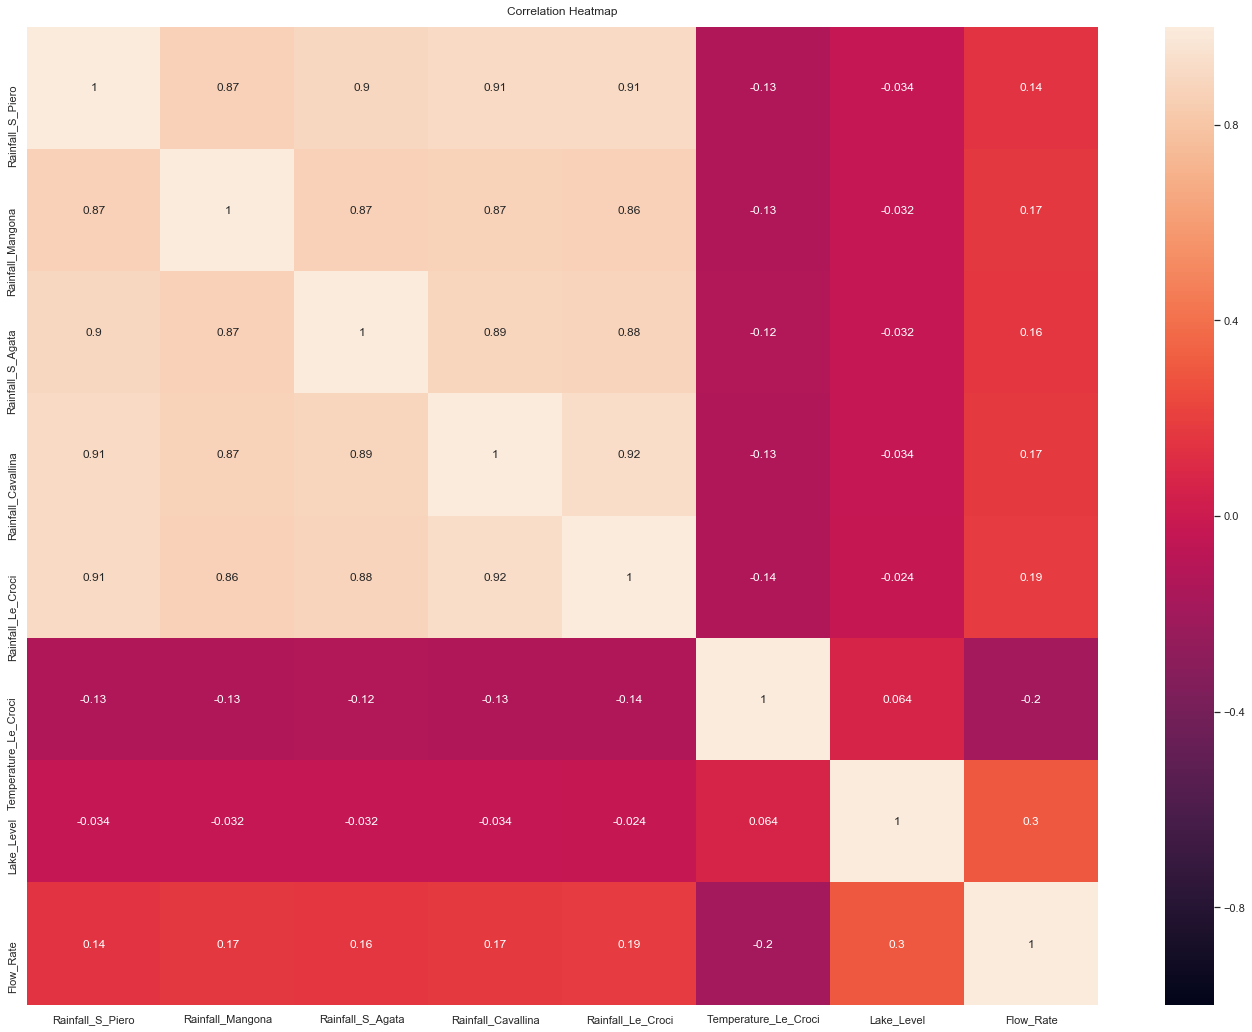

In [746]:
f, ax = plt.subplots(figsize=(24, 18))
heatmap = sns.heatmap(dati.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

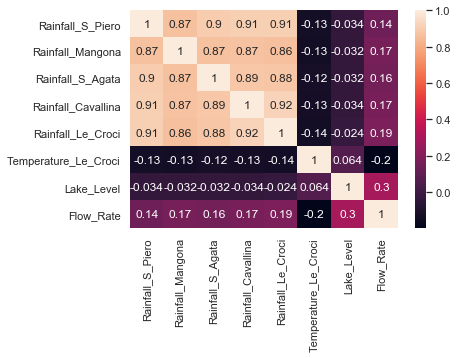

In [747]:
corrMatrix = dati.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Autocorrelation**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Casi Autocorrelation plot')

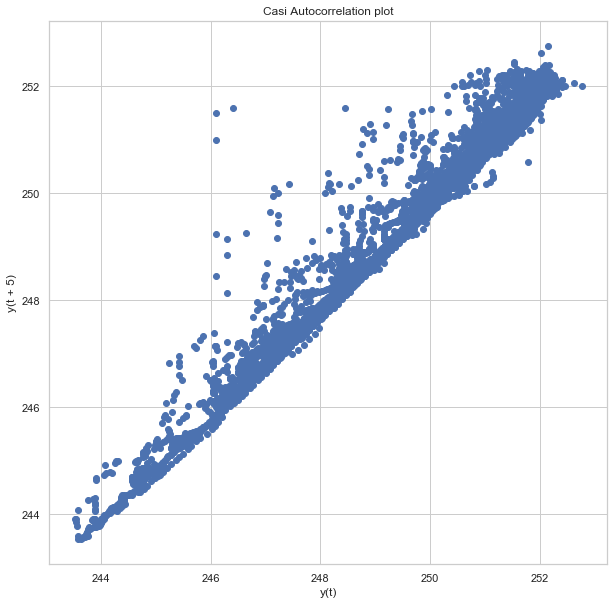

In [748]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10,10))
lag_plot(dati['Lake_Level'], lag=5)
plt.title('Casi Autocorrelation plot')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Casi Autocorrelation plot')

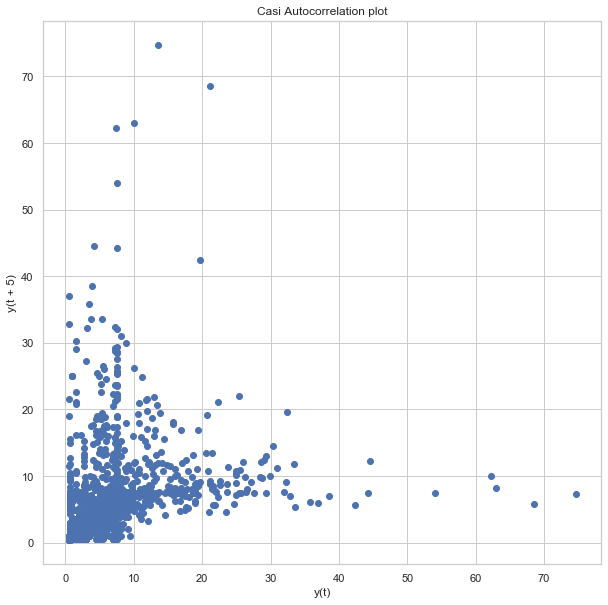

In [749]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10,10))
lag_plot(dati['Flow_Rate'], lag=5)
plt.title('Casi Autocorrelation plot')

**Correlation with target variable**

In [750]:
correlations = dati.corrwith(dati.Lake_Level)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 Flow_Rate               0.298833
Temperature_Le_Croci    0.063569
dtype: float64

Most Negative Correlations: 
 Rainfall_Le_Croci    -0.024466
Rainfall_Mangona     -0.032220
Rainfall_S_Agata     -0.032222
Rainfall_Cavallina   -0.033917
Rainfall_S_Piero     -0.034109
dtype: float64


Text(0.5, 1.0, 'Correlation with Lake_Level \n')

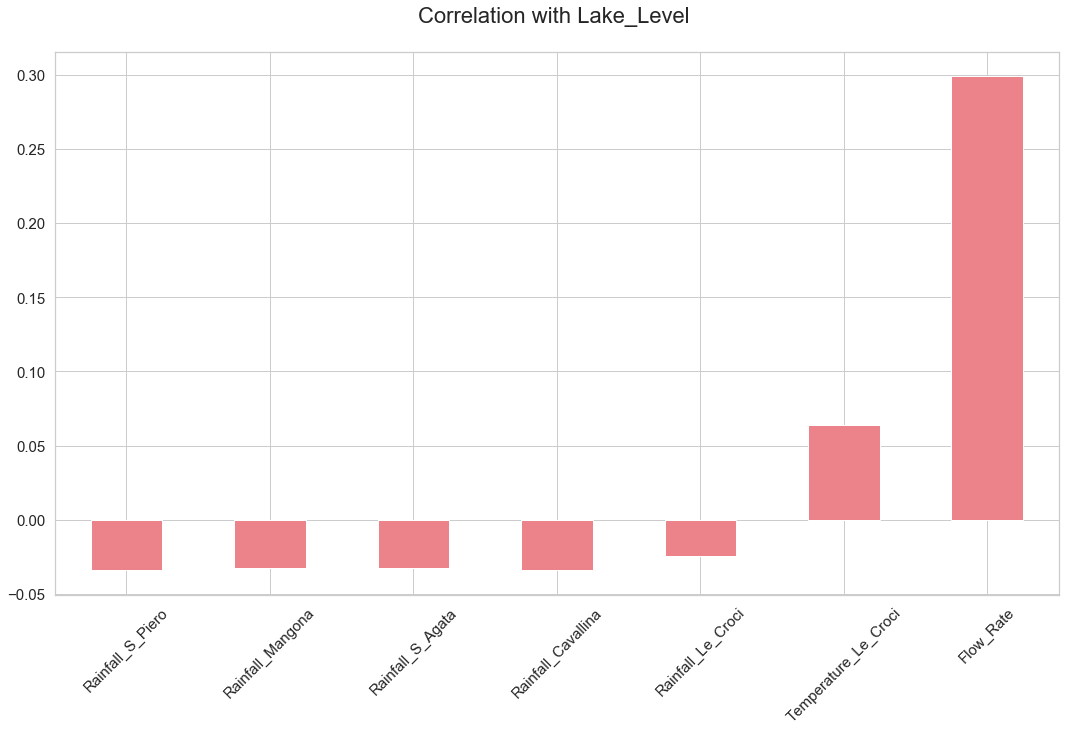

In [751]:
correlations = dati.corrwith(dati.Lake_Level)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Lake_Level \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

Text(0.5, 1.0, 'Correlation with Flow_Rate \n')

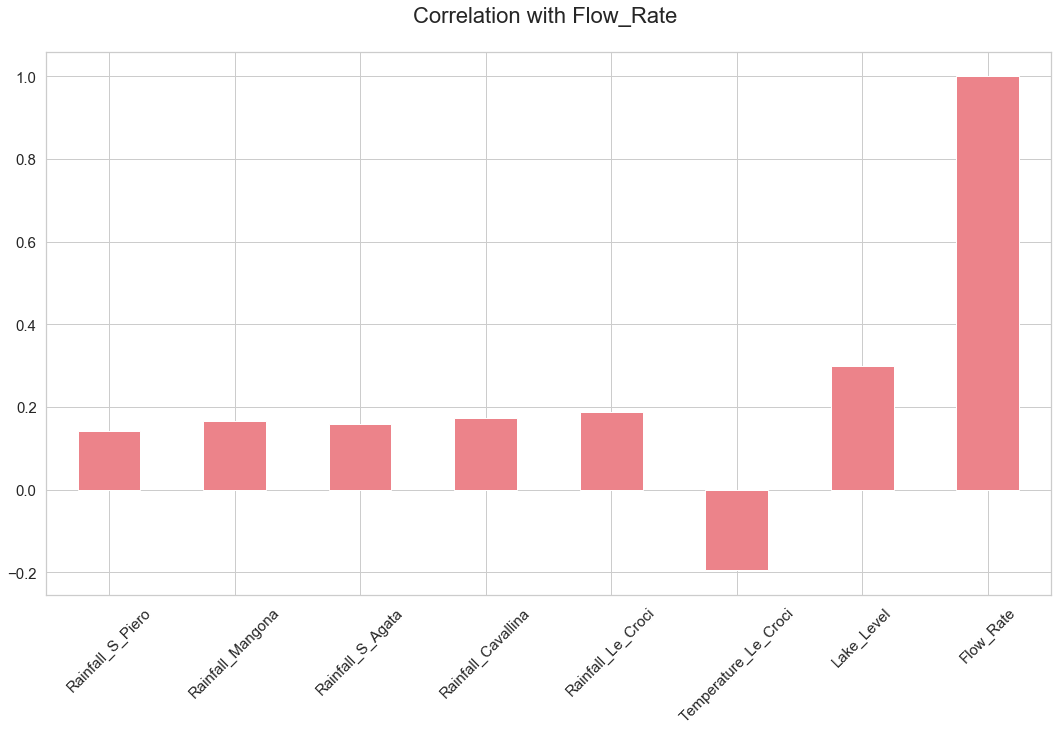

In [752]:
correlations = dati.corrwith(dati.Flow_Rate)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Flow_Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

 **Deleting one features every two features correlated over a threeshold value 0,7**

In [753]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
selected_columns = dati.columns[columns]
dati = dati[selected_columns]

In [244]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


<a id='b'></a>
## 2. Data Preparation ([to top](#top))

In [755]:
#Split ID as a Target value
target = dati.Lake_Level
df2 = dati.drop(['Lake_Level'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.3)


In [756]:
print('TRAIN SET:\nnumero di record: {}\nnumero di attributi: {}'
      .format(X_train.shape[0], X_train.shape[1]))
print('TEST SET:\nnumero di record: {}\nnumero di attributi: {}'
      .format(X_test.shape[0], X_test.shape[1]))

TRAIN SET:
numero di record: 4217
numero di attributi: 3
TEST SET:
numero di record: 1808
numero di attributi: 3


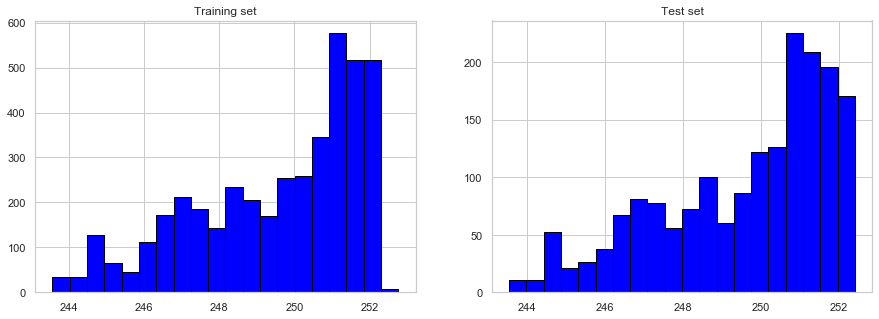

In [757]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(y_train, bins=20,color = 'blue', rwidth=1,edgecolor='black')
#plt.xlabel('Label')
plt.title('Training set')

plt.subplot(122)
plt.hist(y_test, bins=20, rwidth=1,color = 'blue',edgecolor='black')
#plt.xlabel('Label')
plt.title('Test set')

plt.show()
#plt.savefig('C:\\Users\\Tommaso\\Desktop\\IRPET\\pred_models\\pics\\log_train_test.png', bbox_inches='tight')

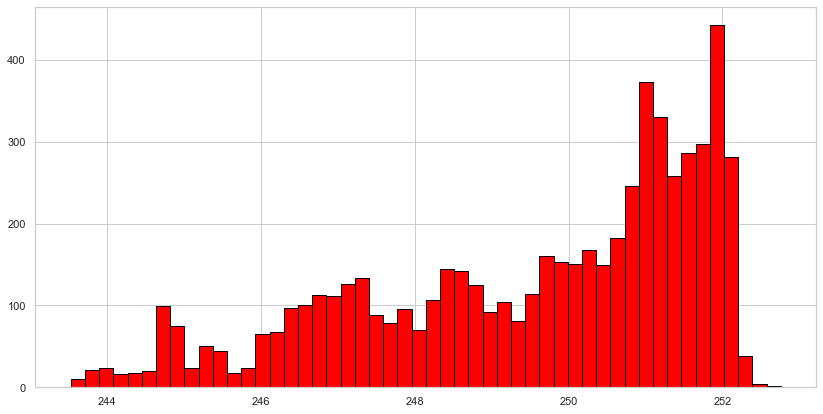

In [758]:
plt.figure(figsize=(14, 7))
plt.hist(target, bins = 50, color = 'red',edgecolor='black');#log transf
#plt.savefig('C:\\Users\\Tommaso\\Desktop\\IRPET\\pred_models\\pics\\log_after.png', bbox_inches='tight')

<a id='c'></a>
## 3. Models ([to top](#top))

<a id='c1'></a>
### 3.1 Best Model ([to top](#top))

In [245]:
#Import Libraries and Read the data
import pandas as pd 
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, tree
import xgboost
from sklearn.model_selection import train_test_split
import lightgbm as lgb 
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import r2_score, mean_squared_error
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression


In [761]:
regressors = []
model0 = LinearRegression()
regressors.append(model0)
model1 = xg.XGBRegressor()
regressors.append(model1)
model2 = lgb.LGBMRegressor()
regressors.append(model2)
model3 = tree.DecisionTreeRegressor()
regressors.append(model3)
model4 = RandomForestRegressor()
regressors.append(model4)
model5 = CatBoostRegressor()
regressors.append(model5)

In [762]:
for reg in regressors:
    reg.fit(X_train, y_train)
    y_pred= reg.predict(X_test)
    print('r2 score: '+str(r2_score(y_test, y_pred)))
    print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, y_pred))))

r2 score: 0.38544973100182156
RMSE : 1.6957188932739988
r2 score: 0.41193901082905815
RMSE : 1.6587706311450467
r2 score: -0.01204054556073797
RMSE : 2.17607624723113
r2 score: 0.2753669323457508
RMSE : 1.8413410140154896
Learning rate set to 0.050426
0:	learn: 2.1575882	total: 11.3ms	remaining: 11.3s
1:	learn: 2.1325665	total: 15ms	remaining: 7.49s
2:	learn: 2.1055162	total: 18.6ms	remaining: 6.18s
3:	learn: 2.0799130	total: 22ms	remaining: 5.47s
4:	learn: 2.0593660	total: 25.3ms	remaining: 5.04s
5:	learn: 2.0371783	total: 28.6ms	remaining: 4.74s
6:	learn: 2.0127242	total: 32ms	remaining: 4.54s
7:	learn: 1.9888884	total: 35.3ms	remaining: 4.38s
8:	learn: 1.9710570	total: 38.6ms	remaining: 4.25s
9:	learn: 1.9522482	total: 42ms	remaining: 4.16s
10:	learn: 1.9333452	total: 45.4ms	remaining: 4.08s
11:	learn: 1.9190137	total: 48.8ms	remaining: 4.02s
12:	learn: 1.9040778	total: 52.1ms	remaining: 3.96s
13:	learn: 1.8899167	total: 55.5ms	remaining: 3.91s
14:	learn: 1.8771170	total: 58.9ms	rem

185:	learn: 1.6488250	total: 724ms	remaining: 3.17s
186:	learn: 1.6480601	total: 729ms	remaining: 3.17s
187:	learn: 1.6475621	total: 733ms	remaining: 3.17s
188:	learn: 1.6471342	total: 739ms	remaining: 3.17s
189:	learn: 1.6459940	total: 745ms	remaining: 3.18s
190:	learn: 1.6455016	total: 751ms	remaining: 3.18s
191:	learn: 1.6451175	total: 755ms	remaining: 3.17s
192:	learn: 1.6446117	total: 758ms	remaining: 3.17s
193:	learn: 1.6441824	total: 761ms	remaining: 3.16s
194:	learn: 1.6436020	total: 765ms	remaining: 3.16s
195:	learn: 1.6431652	total: 768ms	remaining: 3.15s
196:	learn: 1.6429187	total: 771ms	remaining: 3.14s
197:	learn: 1.6427730	total: 776ms	remaining: 3.14s
198:	learn: 1.6425666	total: 779ms	remaining: 3.14s
199:	learn: 1.6420468	total: 782ms	remaining: 3.13s
200:	learn: 1.6418085	total: 786ms	remaining: 3.12s
201:	learn: 1.6413044	total: 789ms	remaining: 3.12s
202:	learn: 1.6408392	total: 793ms	remaining: 3.11s
203:	learn: 1.6398806	total: 797ms	remaining: 3.11s
204:	learn: 

387:	learn: 1.5730959	total: 1.55s	remaining: 2.45s
388:	learn: 1.5729396	total: 1.56s	remaining: 2.45s
389:	learn: 1.5725435	total: 1.56s	remaining: 2.44s
390:	learn: 1.5721974	total: 1.57s	remaining: 2.44s
391:	learn: 1.5719966	total: 1.57s	remaining: 2.44s
392:	learn: 1.5717733	total: 1.58s	remaining: 2.43s
393:	learn: 1.5714103	total: 1.58s	remaining: 2.43s
394:	learn: 1.5711456	total: 1.58s	remaining: 2.43s
395:	learn: 1.5709199	total: 1.59s	remaining: 2.42s
396:	learn: 1.5708158	total: 1.59s	remaining: 2.42s
397:	learn: 1.5706343	total: 1.6s	remaining: 2.41s
398:	learn: 1.5703968	total: 1.6s	remaining: 2.41s
399:	learn: 1.5701655	total: 1.6s	remaining: 2.4s
400:	learn: 1.5696648	total: 1.61s	remaining: 2.4s
401:	learn: 1.5694795	total: 1.61s	remaining: 2.4s
402:	learn: 1.5692802	total: 1.62s	remaining: 2.39s
403:	learn: 1.5691367	total: 1.62s	remaining: 2.39s
404:	learn: 1.5686613	total: 1.62s	remaining: 2.38s
405:	learn: 1.5682567	total: 1.63s	remaining: 2.38s
406:	learn: 1.5680

559:	learn: 1.5329027	total: 2.21s	remaining: 1.74s
560:	learn: 1.5326317	total: 2.21s	remaining: 1.73s
561:	learn: 1.5321915	total: 2.22s	remaining: 1.73s
562:	learn: 1.5319661	total: 2.22s	remaining: 1.73s
563:	learn: 1.5316339	total: 2.23s	remaining: 1.72s
564:	learn: 1.5315172	total: 2.24s	remaining: 1.73s
565:	learn: 1.5314194	total: 2.25s	remaining: 1.72s
566:	learn: 1.5313247	total: 2.25s	remaining: 1.72s
567:	learn: 1.5312163	total: 2.26s	remaining: 1.72s
568:	learn: 1.5309473	total: 2.26s	remaining: 1.71s
569:	learn: 1.5306558	total: 2.27s	remaining: 1.71s
570:	learn: 1.5305474	total: 2.27s	remaining: 1.71s
571:	learn: 1.5303558	total: 2.27s	remaining: 1.7s
572:	learn: 1.5301943	total: 2.28s	remaining: 1.7s
573:	learn: 1.5301410	total: 2.28s	remaining: 1.69s
574:	learn: 1.5297075	total: 2.28s	remaining: 1.69s
575:	learn: 1.5295293	total: 2.29s	remaining: 1.68s
576:	learn: 1.5293080	total: 2.29s	remaining: 1.68s
577:	learn: 1.5289435	total: 2.3s	remaining: 1.68s
578:	learn: 1.5

730:	learn: 1.5023319	total: 2.86s	remaining: 1.05s
731:	learn: 1.5023116	total: 2.87s	remaining: 1.05s
732:	learn: 1.5021263	total: 2.88s	remaining: 1.05s
733:	learn: 1.5020174	total: 2.88s	remaining: 1.04s
734:	learn: 1.5020079	total: 2.89s	remaining: 1.04s
735:	learn: 1.5017991	total: 2.89s	remaining: 1.04s
736:	learn: 1.5015272	total: 2.89s	remaining: 1.03s
737:	learn: 1.5013233	total: 2.9s	remaining: 1.03s
738:	learn: 1.5012580	total: 2.9s	remaining: 1.02s
739:	learn: 1.5011390	total: 2.91s	remaining: 1.02s
740:	learn: 1.5010355	total: 2.91s	remaining: 1.02s
741:	learn: 1.5007902	total: 2.92s	remaining: 1.01s
742:	learn: 1.5007517	total: 2.92s	remaining: 1.01s
743:	learn: 1.5005783	total: 2.93s	remaining: 1.01s
744:	learn: 1.5003113	total: 2.93s	remaining: 1s
745:	learn: 1.5001364	total: 2.94s	remaining: 999ms
746:	learn: 1.5000242	total: 2.94s	remaining: 996ms
747:	learn: 1.5000120	total: 2.94s	remaining: 992ms
748:	learn: 1.4999212	total: 2.95s	remaining: 988ms
749:	learn: 1.499

922:	learn: 1.4749655	total: 3.63s	remaining: 303ms
923:	learn: 1.4749294	total: 3.64s	remaining: 299ms
924:	learn: 1.4749122	total: 3.64s	remaining: 295ms
925:	learn: 1.4748969	total: 3.64s	remaining: 291ms
926:	learn: 1.4746900	total: 3.65s	remaining: 287ms
927:	learn: 1.4746852	total: 3.65s	remaining: 283ms
928:	learn: 1.4744928	total: 3.65s	remaining: 279ms
929:	learn: 1.4743305	total: 3.66s	remaining: 275ms
930:	learn: 1.4743239	total: 3.66s	remaining: 271ms
931:	learn: 1.4740996	total: 3.67s	remaining: 267ms
932:	learn: 1.4740023	total: 3.67s	remaining: 264ms
933:	learn: 1.4738291	total: 3.67s	remaining: 260ms
934:	learn: 1.4737253	total: 3.68s	remaining: 256ms
935:	learn: 1.4736294	total: 3.68s	remaining: 252ms
936:	learn: 1.4734432	total: 3.68s	remaining: 248ms
937:	learn: 1.4734222	total: 3.69s	remaining: 244ms
938:	learn: 1.4732962	total: 3.69s	remaining: 240ms
939:	learn: 1.4731562	total: 3.7s	remaining: 236ms
940:	learn: 1.4731265	total: 3.7s	remaining: 232ms
941:	learn: 1.

**Best models are in order: Catboost (r2 score: 0.43052869149588724 RMSE : 1.6343620440467423), LGBMRegressor (r2 score: 
0.40598673156304643 RMSE : 1.669207843396742), XGBRegressor ( r2 score: 0.3821882012185691 RMSE : 1.7023170259586719)**

<a id='c2'></a>
### 3.2 Linear Regression ([to top](#top))

In [763]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [764]:
model.intercept_

248.60034064108584

In [765]:
model.coef_

array([-0.01935114,  0.03639777,  0.16744651])

In [766]:
predictions = model.predict(X_test)

In [767]:
predictions

array([249.08080802, 249.89408699, 250.00796318, ..., 249.04600805,
       249.72219041, 249.10228229])

In [768]:
model.score(X_test,y_test)

0.12129917769819087

In [769]:
#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.12129917769819087
RMSE : 2.0276624978733255


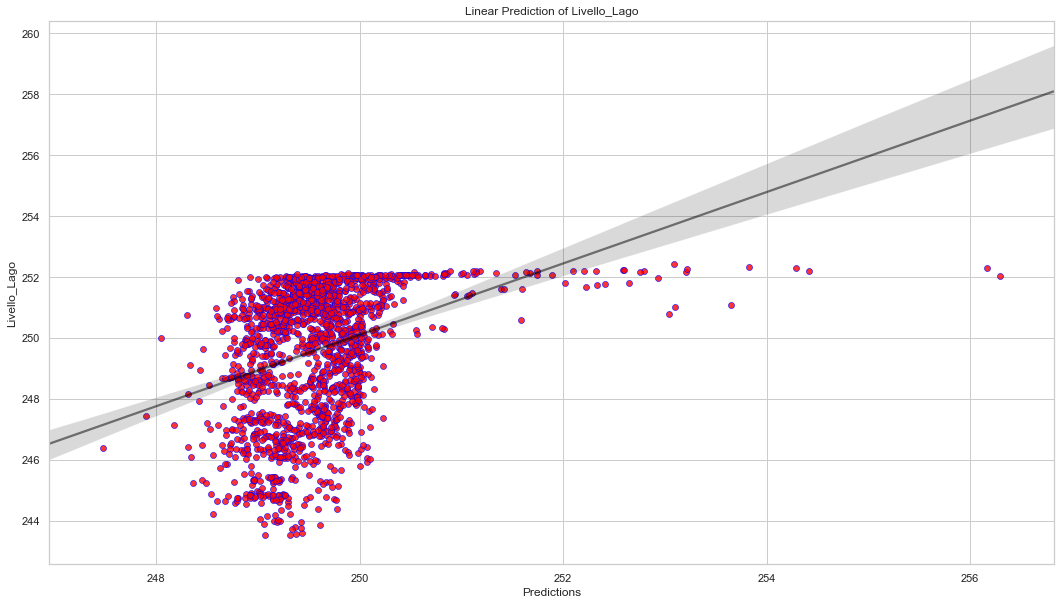

In [772]:
#Visualising the results
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Livello_Lago')
plt.title("Linear Prediction of Livello_Lago")
plt.show()

In [774]:
# print the intercept
print(model.intercept_)

248.60034064108584


In [775]:
coeff_df = pd.DataFrame(model.coef_,df2.columns,columns=['Coefficient']).sort_values(by='Coefficient')
coeff_df

,Coefficient
Rainfall_S_Piero,-0.019351
Temperature_Le_Croci,0.036398
Flow_Rate,0.167447


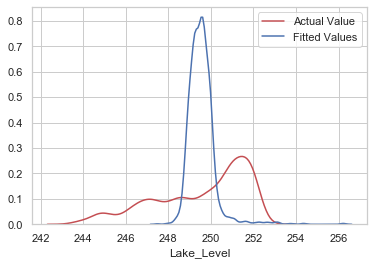

In [773]:
ax1 = sns.distplot(dati['Lake_Level'], hist=False, color='r', label= 'Actual Value')

sns.distplot(predictions, hist=False, color='b', label='Fitted Values', ax=ax1)

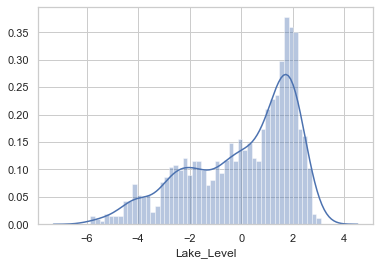

In [800]:
sns.distplot((y_test-predictions),bins=50);

In [803]:
df_results_linear_regr = pd.DataFrame(np.array(y_test), columns=['Lake_Level'])
df_results_linear_regr['predicted_Lake_Level']= predictions

<Figure size 1728x1584 with 0 Axes>

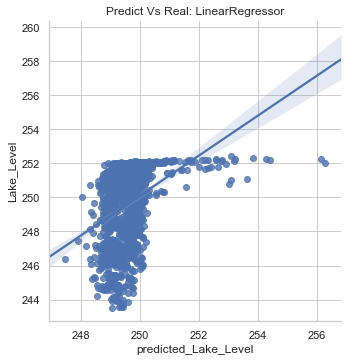

In [804]:
fig = plt.figure(figsize=(24, 22))
sns.lmplot(y='Lake_Level', x='predicted_Lake_Level', data=df_results_linear_regr)
plt.title('Predict Vs Real: LinearRegressor');

**Cross_validation**

In [827]:
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold, RandomizedSearchCV, GridSearchCV



In [828]:
%%time
from sklearn.model_selection import cross_val_score

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=5)
model_cv = cross_val_score(model, X_train,y_train,scoring='neg_root_mean_squared_error', cv =cv)

Wall time: 371 ms


In [829]:
model_cv

array([-2.1644624 , -2.13782274, -1.99437516, -2.20740277, -1.99294833,
       -1.98521588, -2.00093074, -2.02090033, -2.06541066, -2.1833074 ,
       -2.12113624, -2.01539255, -2.06439586, -2.16447451, -2.09917096,
       -1.97050484, -2.17797562, -2.10795138, -2.05560014, -2.00785757,
       -1.98895961, -2.04399148, -2.21236535, -2.04695513, -2.19753373,
       -2.06667557, -2.0065126 , -2.07924988, -2.00791136, -2.13487592])

In [844]:
(model_cv.mean()), model_cv.std()

(-2.077408890225006, 0.0749693765462092)

In [836]:
from sklearn.model_selection import cross_val_score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', model_cv.mean(scores))
    print('STD: ', model_cv.std(scores))
    print('\n')

In [840]:
(model_cv.mean())

-2.077408890225006

In [845]:
(model_cv.std())

0.0749693765462092

**We get a R² value of 2.0774 and standard deviation of 0.0749. The high R² value indicates that our model is overfitting. The standard deviation value indicates we may be overfitting the training data.**

In [802]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('R2_SCORE:', r2_score(y_test, predictions))
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

R2_SCORE: 0.12129917769819087
MAE: 1.7189050068431544
MSE: 4.111415205281894
RMSE: 2.0276624978733255


**Grafico residui**

In [805]:
df_results_linear_regr['residual']=df_results_linear_regr['Lake_Level']-df_results_linear_regr['predicted_Lake_Level']

In [806]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
y = df_results_linear_regr[['predicted_Lake_Level']].values
scaler.fit(y)
y_stand_linear_regr = scaler.transform(y)
df_results_linear_regr['predicted_stand']= y_stand_linear_regr
 
#stand residuals

resid_linear_regr = df_results_linear_regr[['residual']].values
scaler.fit(resid_linear_regr)
resid_stand_linear_regr = scaler.transform(resid_linear_regr)
df_results_linear_regr['residual_stand_linear_regr'] = resid_stand_linear_regr
 
df_results_linear_regr.head(15)

,Lake_Level,predicted_Lake_Level,residual,predicted_stand,residual_stand_linear_regr
0,247.33,249.080808,-1.750808,-0.731863,-0.874849
1,251.94,249.894087,2.045913,0.519364,0.997733
2,251.93,250.007963,1.922037,0.694562,0.936636
3,248.58,249.997334,-1.417334,0.678209,-0.710377
4,251.80,250.395012,1.404988,1.290034,0.681622
5,250.60,251.583828,-0.983828,3.119024,-0.496567
6,251.03,249.721417,1.308583,0.253712,0.634074
7,250.98,249.350678,1.629322,-0.316670,0.792266
8,244.39,249.595853,-5.205853,0.060532,-2.578914
9,250.95,249.250814,1.699186,-0.470309,0.826723


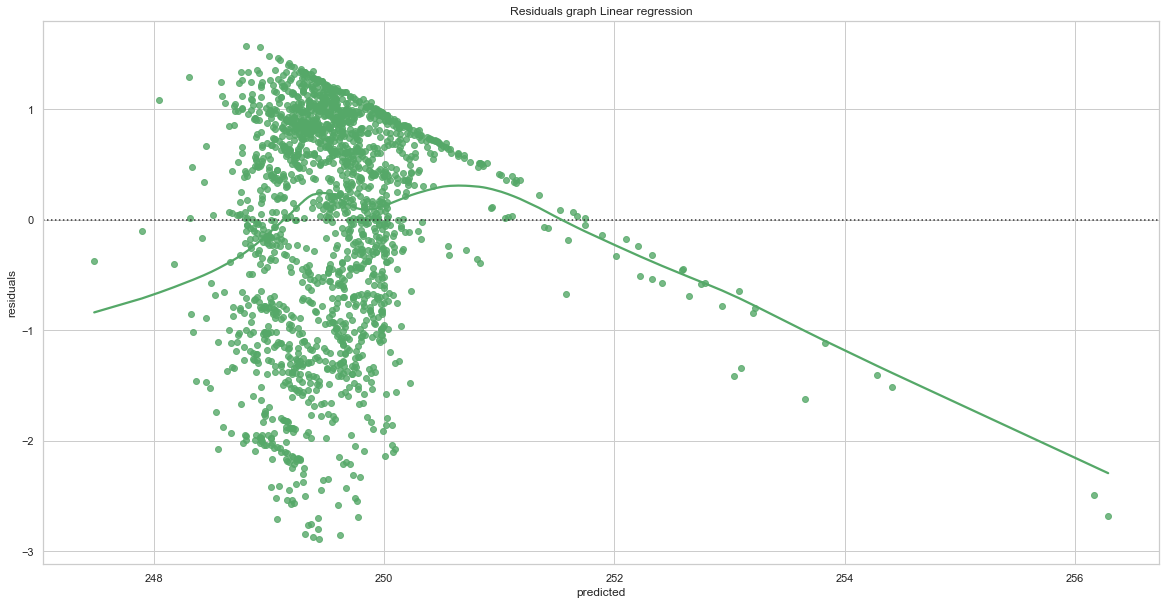

In [807]:
sns.set(style="whitegrid")
 
sample_linear_regr = df_results_linear_regr.sample(frac=0.99)
 
# Plot the residuals after fitting a linear model
plt.figure(figsize=(20, 10))
ax = sns.residplot(x='predicted_Lake_Level', y='residual_stand_linear_regr', data=sample_linear_regr, lowess=True, color="g")
ax.set(xlabel='predicted', ylabel='residuals')
plt.title('Residuals graph Linear regression')
#plt.savefig('C:\\Users\\Tommaso\\Desktop\\IRPET\\pred_models\\pics\\residuals_lm.png', bbox_inches='tight')
plt.show()

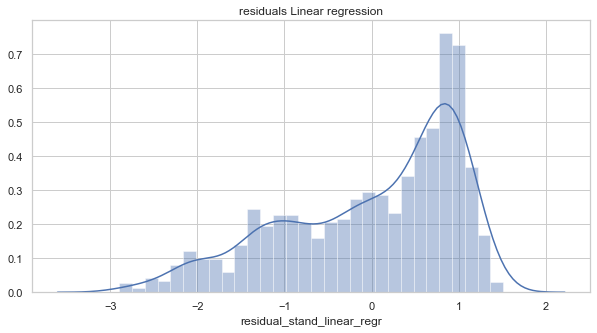

In [808]:
plt.figure(figsize=(10, 5))
sns.distplot(df_results_linear_regr['residual_stand_linear_regr'], bins =30)
plt.title('residuals Linear regression')
plt.show()

**Features importance**

In [770]:
import eli5
from eli5.sklearn import PermutationImportance

In [771]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top important features è la Flow_Rate

Weight,Feature
0.1999 ± 0.0209,Flow_Rate
0.0266 ± 0.0068,Temperature_Le_Croci
0.0067 ± 0.0014,Rainfall_S_Piero


**Ai fini della predictions della variabile target Lake_Level, la variabile Flow_Rate è determinante**

<a id='c3'></a>
### 3.3 Cat Boost Regressor ([to top](#top))

In [895]:
from catboost import CatBoostRegressor

In [896]:
#Split ID as a Target value
target = dati.Lake_Level
df2 = dati.drop(['Lake_Level'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.3)




R2 Score: 0.41107965224461385

RMSE: 4.5389694146308e-05


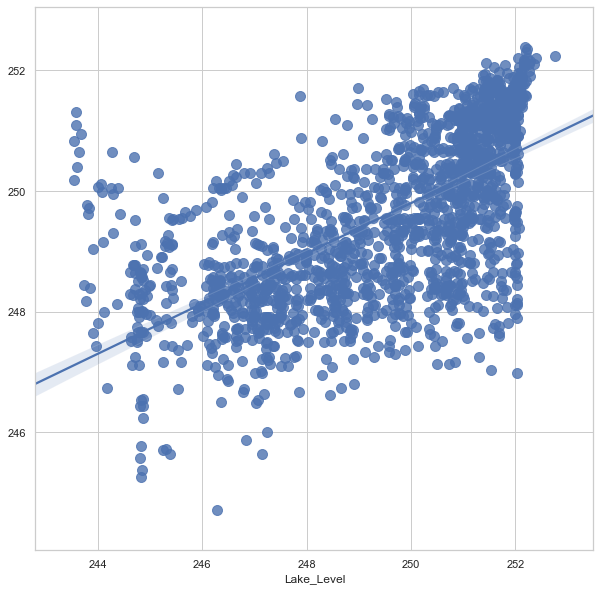

In [900]:
import catboost as ctb
from sklearn import metrics
# fitting a CART model to the data
model_CBR = ctb.CatBoostRegressor(verbose=False, n_estimators=100)
model_CBR.fit(X_train, y_train)
print(); print(model_CBR)

# making predictions
expected_y  = y_test
predicted_y = model_CBR.predict(X_test)

# summarizing the fit of the model
print(); print('R2 Score: '+str(metrics.r2_score(expected_y, predicted_y)))
print(); print('RMSE: '+str(metrics.mean_squared_log_error(expected_y, predicted_y)))
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})



In [901]:
print(expected_y)
print(predicted_y)

3314    251.04
5393    251.78
3606    245.31
6424    249.66
1869    250.24
         ...  
3363    249.41
4269    252.17
2621    249.80
3077    248.42
3540    244.63
Name: Lake_Level, Length: 1808, dtype: float64
[251.18283947 251.01967975 245.72561837 ... 249.54068973 248.63920626
 247.50634473]


**Grid Search Cross Validation**

In [908]:
model = ctb.CatBoostRegressor()

grid = {'learning_rate': [0.03, 0.1, 0.3,1.0],
        'depth': [2, 4, 6, 8, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]
       }

grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train,
                                       train_size=0.8,
                                       cv=5,
                                       plot=True
                                       )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 1.778029497
bestIteration = 990

0:	loss: 1.7780295	best: 1.7780295 (0)	total: 1.75s	remaining: 2m 53s

bestTest = 1.74582437
bestIteration = 998

1:	loss: 1.7458244	best: 1.7458244 (1)	total: 3.94s	remaining: 3m 13s

bestTest = 1.742846446
bestIteration = 380

2:	loss: 1.7428464	best: 1.7428464 (2)	total: 5.7s	remaining: 3m 4s

bestTest = 1.735252774
bestIteration = 34

3:	loss: 1.7352528	best: 1.7352528 (3)	total: 7.04s	remaining: 2m 49s

bestTest = 1.800748717
bestIteration = 999

4:	loss: 1.8007487	best: 1.7352528 (3)	total: 8.63s	remaining: 2m 43s

bestTest = 1.749507184
bestIteration = 999

5:	loss: 1.7495072	best: 1.7352528 (3)	total: 10.1s	remaining: 2m 37s

bestTest = 1.747852968
bestIteration = 936

6:	loss: 1.7478530	best: 1.7352528 (3)	total: 11.4s	remaining: 2m 31s

bestTest = 1.743636676
bestIteration = 71

7:	loss: 1.7436367	best: 1.7352528 (3)	total: 12.6s	remaining: 2m 25s

bestTest = 1.824087991
bestIteration = 999

8:	loss: 1.8240880	best: 1.7352528 (3)	t


bestTest = 5.748663675
bestIteration = 33

71:	loss: 5.7486637	best: 1.7269519 (15)	total: 4m 54s	remaining: 1m 54s

bestTest = 2.559948151
bestIteration = 999

72:	loss: 2.5599482	best: 1.7269519 (15)	total: 5m 7s	remaining: 1m 53s

bestTest = 2.903377594
bestIteration = 998

73:	loss: 2.9033776	best: 1.7269519 (15)	total: 5m 21s	remaining: 1m 53s

bestTest = 4.385328147
bestIteration = 922

74:	loss: 4.3853281	best: 1.7269519 (15)	total: 5m 38s	remaining: 1m 52s

bestTest = 5.908343263
bestIteration = 50

75:	loss: 5.9083433	best: 1.7269519 (15)	total: 5m 47s	remaining: 1m 49s

bestTest = 2.692122407
bestIteration = 999

76:	loss: 2.6921224	best: 1.7269519 (15)	total: 5m 55s	remaining: 1m 46s

bestTest = 2.94605967
bestIteration = 999

77:	loss: 2.9460597	best: 1.7269519 (15)	total: 6m 2s	remaining: 1m 42s

bestTest = 4.044018857
bestIteration = 946

78:	loss: 4.0440189	best: 1.7269519 (15)	total: 6m 10s	remaining: 1m 38s

bestTest = 6.476356489
bestIteration = 62

79:	loss: 6.47635

In [909]:
model.get_params()

{'loss_function': 'RMSE', 'depth': 2, 'l2_leaf_reg': 7, 'learning_rate': 1.0}

**I train the model with the best parameters**

0:	learn: 1.9547614	total: 4.53ms	remaining: 4.53s
1:	learn: 1.8345542	total: 8.89ms	remaining: 4.44s
2:	learn: 1.8011917	total: 13.2ms	remaining: 4.4s
3:	learn: 1.7886581	total: 17.5ms	remaining: 4.35s
4:	learn: 1.7808996	total: 21.7ms	remaining: 4.31s
5:	learn: 1.7755329	total: 25.9ms	remaining: 4.29s
6:	learn: 1.7733452	total: 30.1ms	remaining: 4.28s
7:	learn: 1.7692007	total: 32.7ms	remaining: 4.05s
8:	learn: 1.7638554	total: 34.1ms	remaining: 3.75s
9:	learn: 1.7570149	total: 35.4ms	remaining: 3.5s
10:	learn: 1.7463817	total: 36.7ms	remaining: 3.3s
11:	learn: 1.7326310	total: 37.9ms	remaining: 3.12s
12:	learn: 1.7296956	total: 39.2ms	remaining: 2.97s
13:	learn: 1.7218412	total: 40.5ms	remaining: 2.85s
14:	learn: 1.7189046	total: 41.7ms	remaining: 2.74s
15:	learn: 1.7142350	total: 43ms	remaining: 2.65s
16:	learn: 1.7116382	total: 44.5ms	remaining: 2.57s
17:	learn: 1.7101760	total: 45.9ms	remaining: 2.51s
18:	learn: 1.7064266	total: 47.4ms	remaining: 2.45s
19:	learn: 1.7004869	total:

194:	learn: 1.5638757	total: 310ms	remaining: 1.28s
195:	learn: 1.5638564	total: 311ms	remaining: 1.28s
196:	learn: 1.5636528	total: 313ms	remaining: 1.28s
197:	learn: 1.5633368	total: 315ms	remaining: 1.27s
198:	learn: 1.5633161	total: 316ms	remaining: 1.27s
199:	learn: 1.5627493	total: 317ms	remaining: 1.27s
200:	learn: 1.5626644	total: 319ms	remaining: 1.27s
201:	learn: 1.5624407	total: 320ms	remaining: 1.26s
202:	learn: 1.5620541	total: 322ms	remaining: 1.26s
203:	learn: 1.5614341	total: 324ms	remaining: 1.26s
204:	learn: 1.5611968	total: 327ms	remaining: 1.27s
205:	learn: 1.5606863	total: 329ms	remaining: 1.27s
206:	learn: 1.5604797	total: 331ms	remaining: 1.27s
207:	learn: 1.5599779	total: 333ms	remaining: 1.27s
208:	learn: 1.5597467	total: 335ms	remaining: 1.27s
209:	learn: 1.5594438	total: 336ms	remaining: 1.26s
210:	learn: 1.5588648	total: 338ms	remaining: 1.26s
211:	learn: 1.5585953	total: 339ms	remaining: 1.26s
212:	learn: 1.5584209	total: 340ms	remaining: 1.26s
213:	learn: 

370:	learn: 1.5266670	total: 594ms	remaining: 1.01s
371:	learn: 1.5266497	total: 595ms	remaining: 1s
372:	learn: 1.5264101	total: 597ms	remaining: 1s
373:	learn: 1.5259239	total: 599ms	remaining: 1s
374:	learn: 1.5259145	total: 601ms	remaining: 1s
375:	learn: 1.5256015	total: 602ms	remaining: 999ms
376:	learn: 1.5253022	total: 603ms	remaining: 997ms
377:	learn: 1.5252085	total: 605ms	remaining: 995ms
378:	learn: 1.5250390	total: 607ms	remaining: 994ms
379:	learn: 1.5248094	total: 608ms	remaining: 992ms
380:	learn: 1.5248028	total: 609ms	remaining: 990ms
381:	learn: 1.5247139	total: 611ms	remaining: 988ms
382:	learn: 1.5247090	total: 613ms	remaining: 987ms
383:	learn: 1.5246975	total: 614ms	remaining: 985ms
384:	learn: 1.5246860	total: 615ms	remaining: 983ms
385:	learn: 1.5244233	total: 617ms	remaining: 981ms
386:	learn: 1.5243712	total: 620ms	remaining: 981ms
387:	learn: 1.5242891	total: 621ms	remaining: 980ms
388:	learn: 1.5242832	total: 623ms	remaining: 978ms
389:	learn: 1.5241878	to

568:	learn: 1.5064047	total: 882ms	remaining: 668ms
569:	learn: 1.5059759	total: 883ms	remaining: 666ms
570:	learn: 1.5059434	total: 889ms	remaining: 668ms
571:	learn: 1.5058886	total: 891ms	remaining: 667ms
572:	learn: 1.5058319	total: 893ms	remaining: 665ms
573:	learn: 1.5057558	total: 894ms	remaining: 664ms
574:	learn: 1.5056652	total: 897ms	remaining: 663ms
575:	learn: 1.5055977	total: 899ms	remaining: 662ms
576:	learn: 1.5055474	total: 901ms	remaining: 661ms
577:	learn: 1.5052001	total: 904ms	remaining: 660ms
578:	learn: 1.5051086	total: 907ms	remaining: 659ms
579:	learn: 1.5050190	total: 910ms	remaining: 659ms
580:	learn: 1.5048205	total: 911ms	remaining: 657ms
581:	learn: 1.5047584	total: 913ms	remaining: 656ms
582:	learn: 1.5046881	total: 914ms	remaining: 654ms
583:	learn: 1.5046260	total: 916ms	remaining: 652ms
584:	learn: 1.5045378	total: 917ms	remaining: 651ms
585:	learn: 1.5045317	total: 918ms	remaining: 649ms
586:	learn: 1.5040925	total: 920ms	remaining: 647ms
587:	learn: 

735:	learn: 1.4905060	total: 1.15s	remaining: 414ms
736:	learn: 1.4904235	total: 1.16s	remaining: 412ms
737:	learn: 1.4903826	total: 1.16s	remaining: 411ms
738:	learn: 1.4902468	total: 1.16s	remaining: 410ms
739:	learn: 1.4901886	total: 1.16s	remaining: 408ms
740:	learn: 1.4901369	total: 1.16s	remaining: 407ms
741:	learn: 1.4901332	total: 1.16s	remaining: 405ms
742:	learn: 1.4901242	total: 1.17s	remaining: 404ms
743:	learn: 1.4900951	total: 1.17s	remaining: 402ms
744:	learn: 1.4900277	total: 1.17s	remaining: 401ms
745:	learn: 1.4900086	total: 1.17s	remaining: 399ms
746:	learn: 1.4898905	total: 1.17s	remaining: 398ms
747:	learn: 1.4898886	total: 1.18s	remaining: 396ms
748:	learn: 1.4898651	total: 1.18s	remaining: 395ms
749:	learn: 1.4898617	total: 1.18s	remaining: 393ms
750:	learn: 1.4896630	total: 1.18s	remaining: 392ms
751:	learn: 1.4895355	total: 1.18s	remaining: 390ms
752:	learn: 1.4893378	total: 1.19s	remaining: 389ms
753:	learn: 1.4892470	total: 1.19s	remaining: 387ms
754:	learn: 

934:	learn: 1.4761432	total: 1.44s	remaining: 100ms
935:	learn: 1.4760393	total: 1.44s	remaining: 98.5ms
936:	learn: 1.4760302	total: 1.44s	remaining: 97ms
937:	learn: 1.4760089	total: 1.44s	remaining: 95.4ms
938:	learn: 1.4760056	total: 1.45s	remaining: 93.9ms
939:	learn: 1.4759647	total: 1.45s	remaining: 92.3ms
940:	learn: 1.4759076	total: 1.45s	remaining: 90.8ms
941:	learn: 1.4758842	total: 1.45s	remaining: 89.3ms
942:	learn: 1.4758539	total: 1.45s	remaining: 87.7ms
943:	learn: 1.4758484	total: 1.45s	remaining: 86.2ms
944:	learn: 1.4758323	total: 1.45s	remaining: 84.6ms
945:	learn: 1.4757842	total: 1.45s	remaining: 83ms
946:	learn: 1.4757750	total: 1.46s	remaining: 81.5ms
947:	learn: 1.4757487	total: 1.46s	remaining: 79.9ms
948:	learn: 1.4757095	total: 1.46s	remaining: 78.4ms
949:	learn: 1.4756820	total: 1.46s	remaining: 76.9ms
950:	learn: 1.4755523	total: 1.46s	remaining: 75.4ms
951:	learn: 1.4755389	total: 1.46s	remaining: 73.8ms
952:	learn: 1.4755307	total: 1.47s	remaining: 72.3m

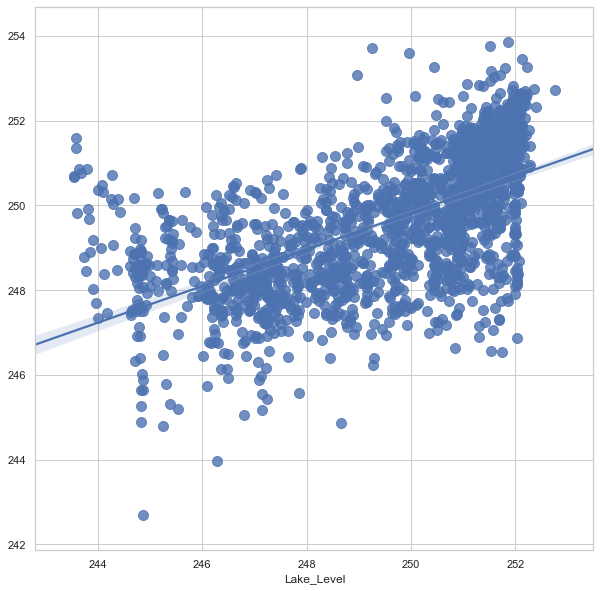

In [910]:
# fitting a CART model to the data
model_CBR = ctb.CatBoostRegressor(loss_function='RMSE', depth=2, l2_leaf_reg=7, learning_rate=1.0)
model_CBR.fit(X_train, y_train)
print(); print(model_CBR)

# making predictions
expected_y  = y_test
predicted_y = model_CBR.predict(X_test)

# summarizing the fit of the model
print(); print('R2 Score: '+str(metrics.r2_score(expected_y, predicted_y)))
print(); print('RMSE: '+str(metrics.mean_squared_log_error(expected_y, predicted_y)))
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

In [911]:
print(expected_y)
print(predicted_y)

3314    251.04
5393    251.78
3606    245.31
6424    249.66
1869    250.24
         ...  
3363    249.41
4269    252.17
2621    249.80
3077    248.42
3540    244.63
Name: Lake_Level, Length: 1808, dtype: float64
[250.89457704 250.82251356 245.78110567 ... 249.08538549 248.53737796
 247.42160137]


<a id='c4'></a>
### 3.4 Light Gradient Boosting Machine ([to top](#top))

In [493]:
# Importing Required Library 
import lightgbm as lgb 
  
# LGBMRegressor imported for a regression model. 
from lightgbm import LGBMRegressor

In [494]:
# Creating an object for model and fitting it on training data set  
model = LGBMRegressor()
model.fit(X_train, y_train) 
  

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [495]:
# Predicting the Target variable 
pred = model.fit(X_test, y_test) 
print(pred) 
accuracy = model.score(X_test, y_test) 
print(accuracy) 

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
0.6040281787471942


In [498]:
# making predictions
expected_y  = y_test
predicted_y = model.predict(X_test)


R2 Score: 0.6040281787471942

RMSE: 3.033894110055974e-05


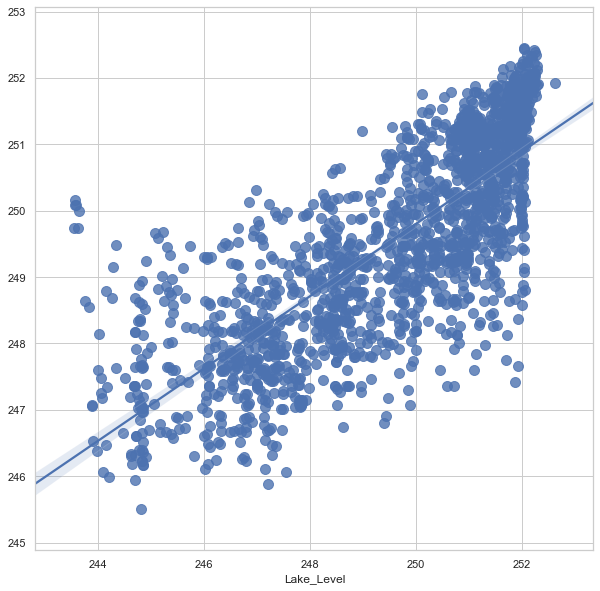

In [499]:
# summarizing the fit of the model
print(); print('R2 Score: '+str(metrics.r2_score(expected_y, predicted_y)))
print(); print('RMSE: '+str(metrics.mean_squared_log_error(expected_y, predicted_y)))
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})


#### GridSearch CV per LGBMRegressor

In [500]:
from sklearn.model_selection import GridSearchCV

params = {
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}

grid = GridSearchCV(lgb.LGBMRegressor(random_state=0), params, scoring='r2', cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=0,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.03, 0.003],
                         'max_depth': [-1, 3, 5],
                         'n_estimators': [50, 100, 200, 500],
         

In [501]:
r2_score(y_train, grid.predict(X_train)) # output is 0.69

0.5012106866133252

In [502]:
grid.best_estimator_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.03, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=21, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [503]:
grid.best_params_

{'learning_rate': 0.03, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 21}

**Rialleno con best parameters**

In [511]:
# Creating an object for model and fitting it on training data set  
model = LGBMRegressor(learning_rate=0.03, 
                      max_depth= -1, 
                      n_estimators=200, 
                      num_leaves= 21)
model.fit(X_train, y_train) 

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.03, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=21, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [512]:
# Predicting the Target variable 
pred = model.fit(X_test, y_test) 
print(pred) 
accuracy = model.score(X_test, y_test) 
print(accuracy) 

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.03, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=21, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
0.5289245487808911


In [513]:
# making predictions
expected_y  = y_test
predicted_y = model.predict(X_test)


R2 Score: 0.5289245487808911

RMSE: 3.6086217145010286e-05


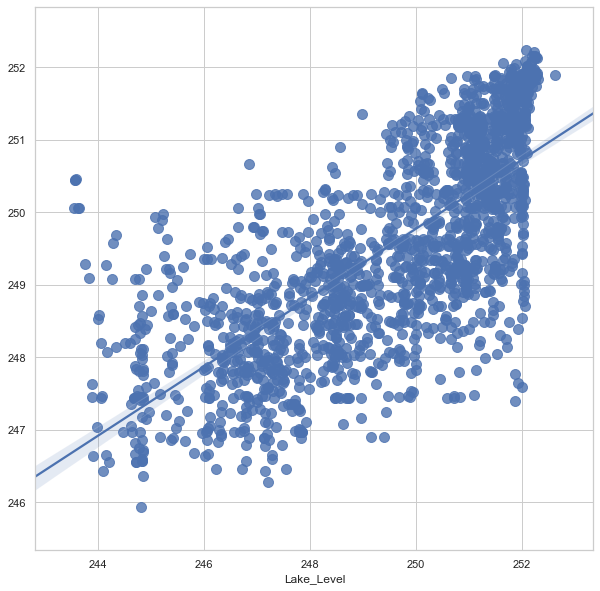

In [514]:
# summarizing the fit of the model
print(); print('R2 Score: '+str(metrics.r2_score(expected_y, predicted_y)))
print(); print('RMSE: '+str(metrics.mean_squared_log_error(expected_y, predicted_y)))
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

<a id='c5'></a>
### 3.5 XG Boost Regressor ([to top](#top))

In [515]:
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

#Instantiation
model = xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [516]:
# Fitting the model 
model.fit(X_train, y_train) 
  
# Predict the model 
pred = model.predict(X_test) 
  
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 

RMSE :  1.923973


In [517]:
# making predictions
expected_y  = y_test
predicted_y = model.predict(X_test)


R2 Score: 0.22293625632357617

RMSE: 5.939615984515868e-05


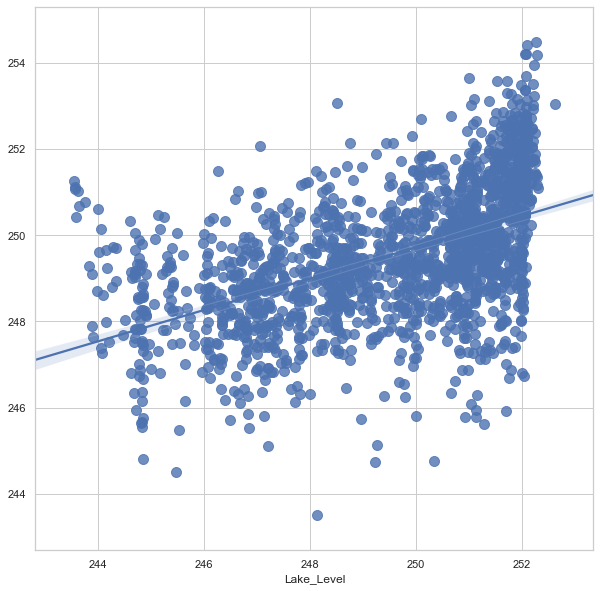

In [518]:
# summarizing the fit of the model
print(); print('R2 Score: '+str(metrics.r2_score(expected_y, predicted_y)))
print(); print('RMSE: '+str(metrics.mean_squared_log_error(expected_y, predicted_y)))
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

**Cross validation**

In [522]:
X_train_partition, X_val, y_train_partition, y_val = train_test_split(X_train, y_train, 
                                                                      test_size=0.1, random_state=5)

In [525]:
%%time
#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

#HYPERPARAM TUNING (do it sequentially!)
param_grid={'max_depth':[10], #determines how deeply each tree is allowed to grow during any boosting round.
            'min_child_weight':[8],#Defines the minimum sum of weights of all observations required 
                                  #in a child. Higher values prevent a model from learning relations
                                  #which might be highly specific to the particular sample selected for a tree.
            
            'gamma':[0],# [0,1]A node is split only when the resulting split gives a positive reduction
                                     #in the loss function. Gamma specifies the minimum loss reduction required to make a split.
                                     #Controls whether a given node will split based on the expected reduction in loss after the split.
                                     #A higher value leads to fewer splits. Supported only for tree-based learners.
            
            'subsample':[0.9], #[default=1] percentage of samples used per tree. Low value can lead to underfitting.
            'colsample_bytree': [0.9],  #[default=1] percentage of features used per tree. High value can lead to overfitting.      
            
             #XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.            
            'reg_lambda':[0.5], #default 1   L2   [0.001,110] L2 regularization on leaf weights and is smoother than L1 regularization
            'reg_alpha':[0],        #def0 L1 speed up the algor [0.001,110] L1 regularization on leaf weights.
                                      #A large value leads to more regularization.
            
            'eta':[0.03],# [default=0.3]Makes the model more robust by shrinking the weights on each step.Typical final values to
                        #be used: 0.01-0.2 
            'n_estimators':[10000]} #determines how deeply each tree is allowed to grow during any boosting round.


model= xg.XGBRegressor(objective='reg:squarederror', missing=None, seed=5)



search = GridSearchCV(model,param_grid,scoring='neg_root_mean_squared_error',verbose=0, n_jobs=-1, cv=5)

result = search.fit(X_train_partition,y_train_partition,
         early_stopping_rounds=10,
         eval_metric= 'rmse',
        eval_set=[(X_train_partition,y_train_partition),(X_val,y_val)],
        verbose=False)


#print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Hyperparameters: {'colsample_bytree': 0.9, 'eta': 0.03, 'gamma': 0, 'max_depth': 10, 'min_child_weight': 8, 'n_estimators': 10000, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 0.9}
Wall time: 3.8 s


In [530]:
# making predictions
expected_y  = y_test
predicted_y = result.best_estimator_.predict(X_test)


R2 Score: 0.3840849993638098

RMSE: 4.714221267702312e-05


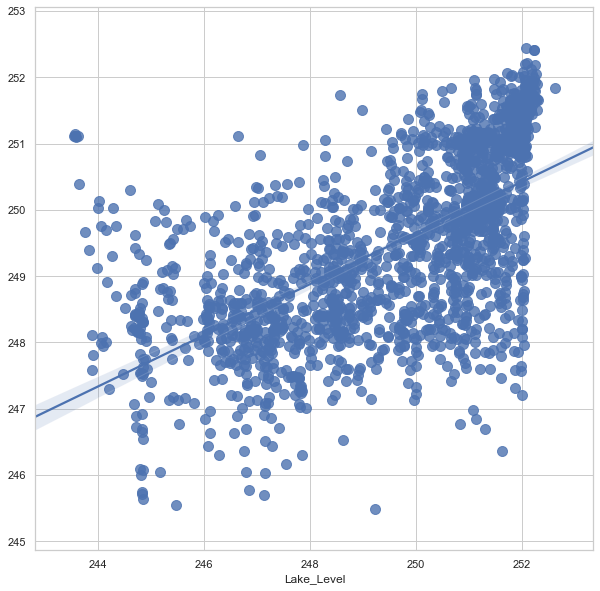

In [531]:
# summarizing the fit of the model
print(); print('R2 Score: '+str(metrics.r2_score(expected_y, predicted_y)))
print(); print('RMSE: '+str(metrics.mean_squared_log_error(expected_y, predicted_y)))
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

<a id='c6'></a>
### 3.6 ARIMA Time Series Forecasting ([to top](#top))

In [51]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot


dati = pd.read_csv('Lake_Bilancino.csv', header=0)
dati.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


         Date  Lake_Level
0  03/06/2002      249.43
1  04/06/2002      249.43
2  05/06/2002      249.43
3  06/06/2002      249.43
4  07/06/2002      249.44


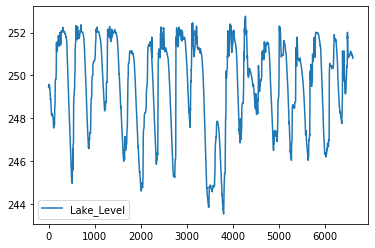

In [52]:
dati = [dati['Date'],dati['Lake_Level']]
series = pd.concat(dati, axis=1)
print(series.head())
series.plot()
pyplot.show()

In [53]:
series.head()

,Date,Lake_Level
0,03/06/2002,249.43
1,04/06/2002,249.43
2,05/06/2002,249.43
3,06/06/2002,249.43
4,07/06/2002,249.44


In [54]:
# saving the dataframe 
series.to_csv('./Series.csv', index=False) 

In [55]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
 
series = read_csv('./Series.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())

Date
2002-03-06    249.43
2002-04-06    249.43
2002-05-06    249.43
2002-06-06    249.43
2002-07-06    249.44
Name: Lake_Level, dtype: float64


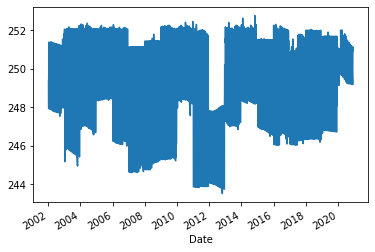

In [56]:
series.plot()
pyplot.show()

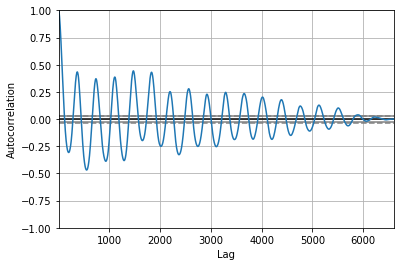

In [57]:
from pandas.plotting import autocorrelation_plot
 
autocorrelation_plot(series)

pyplot.show()

                               SARIMAX Results                                
Dep. Variable:             Lake_Level   No. Observations:                 6603
Model:                 ARIMA(5, 1, 0)   Log Likelihood                6287.164
Date:                Mon, 01 Feb 2021   AIC                         -12562.329
Time:                        19:33:46   BIC                         -12521.558
Sample:                             0   HQIC                        -12548.238
                               - 6603                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3788      0.003    122.428      0.000       0.373       0.385
ar.L2          0.0866      0.004     24.684      0.000       0.080       0.094
ar.L3          0.0241      0.009      2.625      0.0

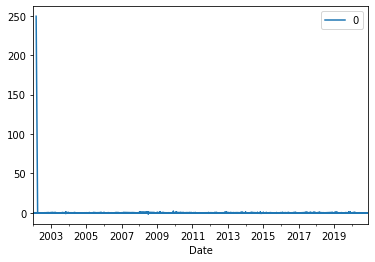

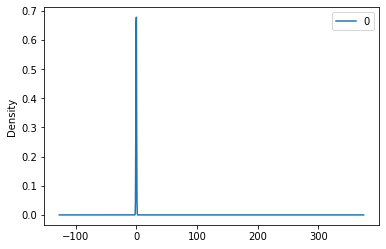

                 0
count  6603.000000
mean      0.037868
std       3.070992
min      -1.401199
25%      -0.022889
50%      -0.008361
75%       0.001961
max     249.430000


In [58]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
series.index = series.index.to_period('M')

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=250.324135, expected=250.330000
predicted=250.345370, expected=250.320000
predicted=250.321596, expected=250.290000
predicted=250.280736, expected=250.260000
predicted=250.247019, expected=250.220000
predicted=250.202860, expected=250.220000
predicted=250.213304, expected=250.230000
predicted=250.230012, expected=250.230000
predicted=250.229608, expected=250.230000
predicted=250.228249, expected=250.230000
predicted=250.229996, expected=250.230000
predicted=250.230543, expected=250.230000
predicted=250.230000, expected=250.230000
predicted=250.230000, expected=250.230000
predicted=250.230000, expected=250.220000
predicted=250.216677, expected=250.220000
predicted=250.218776, expected=250.210000
predicted=250.206255, expected=250.210000
predicted=250.208780, expected=250.210000
predicted=250.209034, expected=250.200000
predicted=250.196681, expected=250.200000
predicted=250.198233, expected=250.190000
predicted=250.186255, expected=250.190000
predicted=250.188780, expected=250

predicted=250.594414, expected=250.460000
predicted=250.592478, expected=250.440000
predicted=250.466379, expected=250.310000
predicted=250.307674, expected=250.320000
predicted=250.330426, expected=250.250000
predicted=250.228647, expected=250.170000
predicted=250.134256, expected=250.150000
predicted=250.123900, expected=250.120000
predicted=250.105160, expected=250.090000
predicted=250.071999, expected=250.000000
predicted=249.960665, expected=249.920000
predicted=249.879978, expected=249.860000
predicted=249.825104, expected=249.760000
predicted=249.714603, expected=249.720000
predicted=249.687497, expected=249.730000
predicted=249.720597, expected=249.740000
predicted=249.740166, expected=249.710000
predicted=249.696261, expected=249.660000
predicted=249.637709, expected=249.600000
predicted=249.573053, expected=249.520000
predicted=249.484448, expected=249.420000
predicted=249.372799, expected=249.340000
predicted=249.295304, expected=249.240000
predicted=249.189732, expected=249

predicted=251.506272, expected=251.510000
predicted=251.508352, expected=251.510000
predicted=251.509104, expected=251.510000
predicted=251.510044, expected=251.510000
predicted=251.509470, expected=251.510000
predicted=251.510000, expected=251.510000
predicted=251.510000, expected=251.510000
predicted=251.510000, expected=251.510000
predicted=251.510000, expected=251.510000
predicted=251.510000, expected=251.510000
predicted=251.510000, expected=251.500000
predicted=251.496593, expected=251.500000
predicted=251.498838, expected=251.510000
predicted=251.513041, expected=251.510000
predicted=251.511206, expected=251.510000
predicted=251.509836, expected=251.510000
predicted=251.509956, expected=251.500000
predicted=251.497124, expected=251.490000
predicted=251.485431, expected=251.480000
predicted=251.475065, expected=251.470000
predicted=251.465109, expected=251.460000
predicted=251.454579, expected=251.450000
predicted=251.444579, expected=251.420000
predicted=251.407766, expected=251

predicted=247.240000, expected=247.230000
predicted=247.226562, expected=247.230000
predicted=247.228850, expected=247.220000
predicted=247.216196, expected=247.210000
predicted=247.205454, expected=247.200000
predicted=247.194511, expected=247.200000
predicted=247.198527, expected=247.190000
predicted=247.185704, expected=247.190000
predicted=247.188358, expected=247.180000
predicted=247.175662, expected=247.170000
predicted=247.165454, expected=247.160000
predicted=247.154511, expected=247.150000
predicted=247.145088, expected=247.150000
predicted=247.147992, expected=247.090000
predicted=247.068514, expected=247.020000
predicted=246.988536, expected=246.910000
predicted=246.861381, expected=247.140000
predicted=247.204045, expected=247.180000
predicted=247.213271, expected=247.200000
predicted=247.216534, expected=247.220000
predicted=247.223817, expected=247.230000
predicted=247.248591, expected=247.270000
predicted=247.287671, expected=247.330000
predicted=247.356552, expected=247

predicted=251.166388, expected=251.160000
predicted=251.148578, expected=251.130000
predicted=251.114217, expected=251.110000
predicted=251.097109, expected=251.080000
predicted=251.065025, expected=251.080000
predicted=251.074709, expected=251.070000
predicted=251.063700, expected=251.070000
predicted=251.067745, expected=251.060000
predicted=251.054351, expected=251.050000
predicted=251.045397, expected=251.040000
predicted=251.034399, expected=251.030000
predicted=251.025036, expected=251.020000
predicted=251.014434, expected=251.000000
predicted=250.990952, expected=250.960000
predicted=250.942831, expected=250.920000
predicted=250.900156, expected=250.870000
predicted=250.845986, expected=250.830000
predicted=250.807778, expected=250.790000
predicted=250.767369, expected=250.760000
predicted=250.741247, expected=250.720000
predicted=250.698283, expected=250.680000
predicted=250.658088, expected=250.640000
predicted=250.617691, expected=250.600000
predicted=250.578327, expected=250

predicted=248.468282, expected=248.470000
predicted=248.469644, expected=248.470000
predicted=248.470026, expected=248.670000
predicted=248.740217, expected=248.690000
predicted=248.719198, expected=248.710000
predicted=248.726424, expected=248.720000
predicted=248.725945, expected=248.720000
predicted=248.734023, expected=248.730000
predicted=248.735069, expected=248.730000
predicted=248.732305, expected=248.740000
predicted=248.744508, expected=248.740000
predicted=248.741079, expected=248.750000
predicted=248.754508, expected=248.750000
predicted=248.751080, expected=248.760000
predicted=248.764508, expected=248.760000
predicted=248.761080, expected=248.760000
predicted=248.760969, expected=248.760000
predicted=248.759974, expected=248.760000
predicted=248.760613, expected=248.760000
predicted=248.760000, expected=248.760000
predicted=248.760000, expected=248.760000
predicted=248.760000, expected=248.770000
predicted=248.773539, expected=248.910000
predicted=248.960660, expected=249

predicted=249.282981, expected=249.270000
predicted=249.253352, expected=249.240000
predicted=249.222714, expected=249.210000
predicted=249.193299, expected=249.180000
predicted=249.163298, expected=249.140000
predicted=249.119673, expected=249.100000
predicted=249.078582, expected=249.070000
predicted=249.051886, expected=249.030000
predicted=249.009404, expected=249.000000
predicted=248.981670, expected=248.950000
predicted=248.925139, expected=248.890000
predicted=248.860289, expected=248.840000
predicted=248.811543, expected=248.800000
predicted=248.776628, expected=248.770000
predicted=248.750542, expected=248.730000
predicted=248.707688, expected=248.690000
predicted=248.667451, expected=248.650000
predicted=248.627665, expected=248.610000
predicted=248.588302, expected=248.570000
predicted=248.547714, expected=248.520000
predicted=248.494087, expected=248.460000
predicted=248.429368, expected=248.400000
predicted=248.367954, expected=248.370000
predicted=248.348562, expected=248

predicted=250.999782, expected=250.980000
predicted=250.992358, expected=250.930000
predicted=250.915066, expected=250.850000
predicted=250.814746, expected=250.800000
predicted=250.771239, expected=250.740000
predicted=250.711628, expected=250.700000
predicted=250.674658, expected=250.660000
predicted=250.635322, expected=250.660000
predicted=250.651633, expected=250.660000
predicted=250.655989, expected=250.780000
predicted=250.820868, expected=250.840000
predicted=250.874015, expected=250.880000
predicted=250.904377, expected=250.930000
predicted=250.954154, expected=250.930000
predicted=250.943158, expected=250.960000
predicted=250.974964, expected=250.950000
predicted=250.952126, expected=250.950000
predicted=250.952037, expected=250.950000
predicted=250.949771, expected=250.950000
predicted=250.951536, expected=250.950000
predicted=250.949488, expected=250.950000
predicted=250.950000, expected=250.880000
predicted=250.854961, expected=250.830000
predicted=250.803594, expected=251

predicted=249.999383, expected=249.970000
predicted=249.936705, expected=249.930000
predicted=249.903642, expected=249.850000
predicted=249.813031, expected=249.820000
predicted=249.795532, expected=249.760000
predicted=249.730141, expected=249.700000
predicted=249.668231, expected=249.630000
predicted=249.592568, expected=249.560000
predicted=249.523449, expected=249.500000
predicted=249.465376, expected=249.450000
predicted=249.420045, expected=249.400000
predicted=249.370992, expected=249.350000
predicted=249.321296, expected=249.280000
predicted=249.244730, expected=249.200000
predicted=249.159237, expected=249.140000
predicted=249.104713, expected=249.080000
predicted=249.046713, expected=249.030000
predicted=248.999682, expected=248.960000
predicted=248.923462, expected=248.900000
predicted=248.865781, expected=248.830000
predicted=248.793062, expected=248.770000
predicted=248.735935, expected=248.700000
predicted=248.662494, expected=248.660000
predicted=248.632580, expected=248

predicted=250.466469, expected=250.460000
predicted=250.455260, expected=250.450000
predicted=250.445453, expected=250.450000
predicted=250.448599, expected=250.450000
predicted=250.449246, expected=250.450000
predicted=250.449430, expected=250.450000
predicted=250.449527, expected=250.450000
predicted=250.450000, expected=250.450000
predicted=250.450000, expected=250.440000
predicted=250.436284, expected=250.440000
predicted=250.438880, expected=250.440000
predicted=250.439816, expected=250.440000
predicted=250.439903, expected=250.440000
predicted=250.439527, expected=250.420000
predicted=250.412568, expected=250.400000
predicted=250.390328, expected=250.400000
predicted=250.397391, expected=250.400000
predicted=250.399438, expected=250.390000
predicted=250.385144, expected=250.390000
predicted=250.387933, expected=250.370000
predicted=250.362384, expected=250.350000
predicted=250.340231, expected=250.340000
predicted=250.333201, expected=250.330000
predicted=250.324602, expected=250

predicted=248.380667, expected=248.360000
predicted=248.345823, expected=248.330000
predicted=248.314510, expected=248.300000
predicted=248.284207, expected=248.270000
predicted=248.253623, expected=248.240000
predicted=248.223156, expected=248.250000
predicted=248.248031, expected=248.250000
predicted=248.248817, expected=248.290000
predicted=248.303311, expected=248.280000
predicted=248.279503, expected=248.280000
predicted=248.280085, expected=248.280000
predicted=248.280279, expected=248.280000
predicted=248.281752, expected=248.280000
predicted=248.279533, expected=248.270000
predicted=248.266282, expected=248.260000
predicted=248.255155, expected=248.240000
predicted=248.231251, expected=248.220000
predicted=248.210008, expected=248.200000
predicted=248.189355, expected=248.170000
predicted=248.155520, expected=248.140000
predicted=248.123926, expected=248.130000
predicted=248.121177, expected=248.120000
predicted=248.113314, expected=248.100000
predicted=248.089500, expected=248

predicted=250.883283, expected=250.890000
predicted=250.893882, expected=250.920000
predicted=250.931941, expected=250.900000
predicted=250.895039, expected=250.900000
predicted=250.899522, expected=250.920000
predicted=250.927934, expected=250.940000
predicted=250.950135, expected=250.940000
predicted=250.941458, expected=250.950000
predicted=250.954578, expected=250.960000
predicted=250.965718, expected=250.960000
predicted=250.961863, expected=250.960000
predicted=250.960395, expected=250.940000
predicted=250.932955, expected=250.940000
predicted=250.938646, expected=250.940000
predicted=250.939518, expected=250.940000
predicted=250.939692, expected=250.940000
predicted=250.939244, expected=250.940000
predicted=250.940000, expected=250.940000
predicted=250.940000, expected=250.940000
predicted=250.940000, expected=250.940000
predicted=250.940000, expected=250.960000
predicted=250.967576, expected=250.980000
predicted=250.989309, expected=250.980000
predicted=250.982214, expected=250

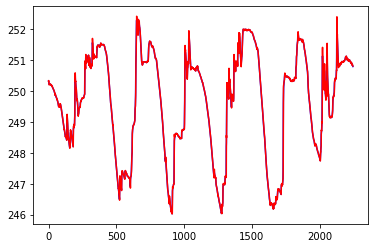

In [59]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = series.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test, color='blue')
pyplot.plot(predictions, color='red')
pyplot.show()

In [60]:
dati = pd.read_csv('./Lake_Bilancino.csv', parse_dates=True)

In [62]:
dati['Date'][:-1]

0       03/06/2002
1       04/06/2002
2       05/06/2002
3       06/06/2002
4       07/06/2002
           ...    
6597    25/06/2020
6598    26/06/2020
6599    27/06/2020
6600    28/06/2020
6601    29/06/2020
Name: Date, Length: 6602, dtype: object

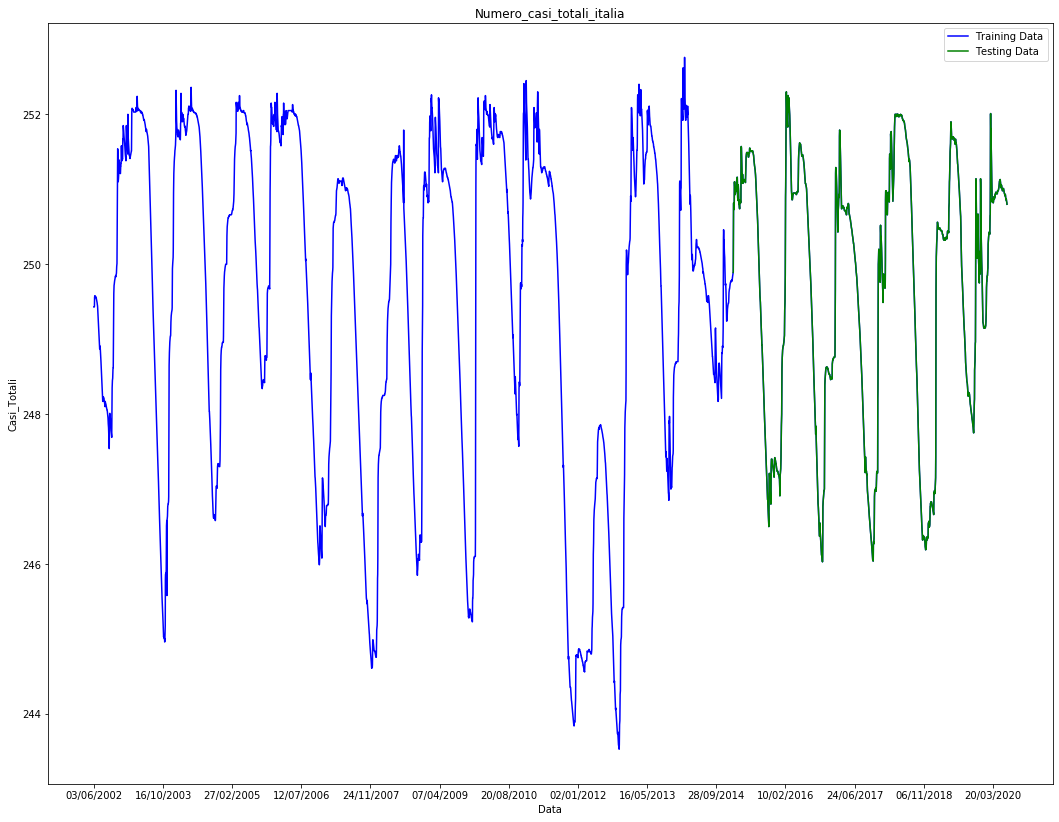

In [68]:
train_data, test_data = dati[0:int(len(dati)*0.7)], dati[int(len(dati)*0.7):]
plt.figure(figsize=(18,14))
plt.title('Numero_casi_totali_italia')
plt.xlabel('Data')
plt.ylabel('Casi_Totali')
plt.plot(dati['Lake_Level'], 'blue', label='Training Data')
plt.plot(test_data['Lake_Level'], 'green', label='Testing Data')
plt.xticks(np.arange(0,6601, 500), dati['Date'][0:6601:500])
plt.legend()

In [69]:
from statsmodels.tsa.arima_model import ARIMA

In [70]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [71]:
train_ar = train_data['Lake_Level'].values
test_ar = test_data['Lake_Level'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)
model_fit.summary()

<class 'list'>
Testing Mean Squared Error: 0.009
Symmetric mean absolute percentage error: 0.791


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 6601
Model:                 ARIMA(5, 1, 0)   Log Likelihood                6285.729
Method:                       css-mle   S.D. of innovations              0.093
Date:                Mon, 01 Feb 2021   AIC                         -12557.458
Time:                        22:32:38   BIC                         -12509.893
Sample:                             1   HQIC                        -12541.019
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.003      0.083      0.934      -0.005       0.005
ar.L1.D.y      0.3788      0.012     30.800      0.000       0.355       0.403
ar.L2.D.y      0.0866      0.013      6.585      0.000       0.061       0.112
ar.L3.D.y      0.0241      0.013      1.827      0.068      -0.002       0.050
ar.L4.D.y      0.0154      0.013      1.168      0.243      -0.010       0.041
ar.L5.D.y      0.0378      0.012      3.073      0.002       0.014       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3826           -0.0000j            1.3826           -0.0000
AR.2            0.8229           -1.8599j            2.0338           -0.1837
AR.3            0.8229           +1.8599j            2.0338            0.1837
AR.4           -1.7173           -1.2953j            2.1510           -0.3972
AR.5           -1.7173           +1.2953j            2.1510            0.3972
-----------------------------------------------------------------------------
"""

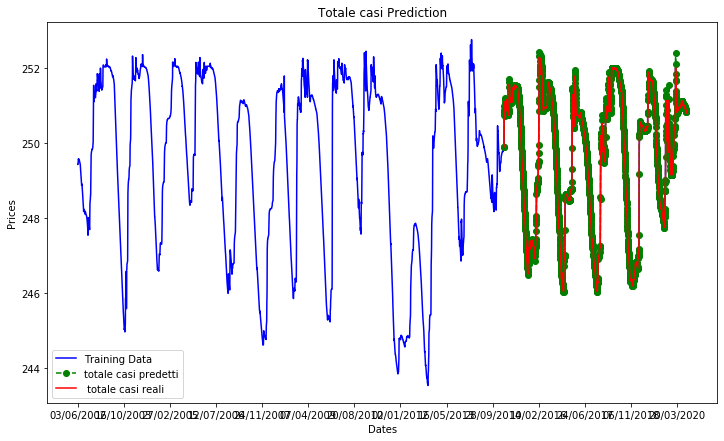

In [73]:
plt.figure(figsize=(12,7))
plt.plot(dati['Lake_Level'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='totale casi predetti')
plt.plot(test_data.index, test_data['Lake_Level'], color='red', label=' totale casi reali')
plt.title('Totale casi Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,6601, 500), dati['Date'][0:6601:500])
plt.legend()

In [74]:
test_data['Date'][0:-1]

4622    28/01/2015
4623    29/01/2015
4624    30/01/2015
4625    31/01/2015
4626    01/02/2015
           ...    
6597    25/06/2020
6598    26/06/2020
6599    27/06/2020
6600    28/06/2020
6601    29/06/2020
Name: Date, Length: 1980, dtype: object

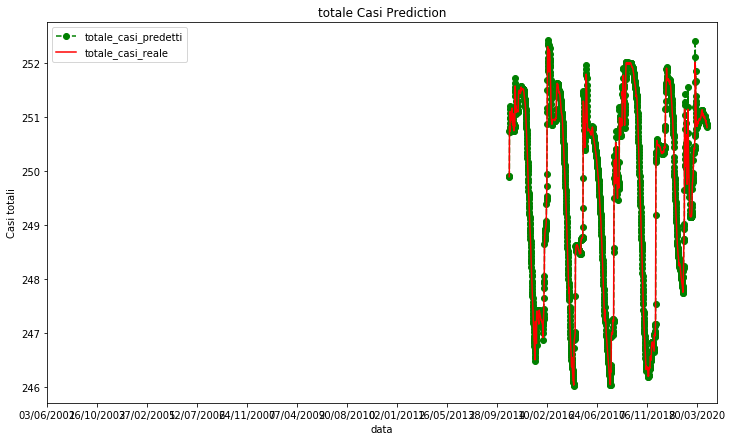

In [75]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='totale_casi_predetti')
plt.plot(test_data.index, test_data['Lake_Level'], color='red', label='totale_casi_reale')
plt.xticks(np.arange(0,6601, 500), dati['Date'][0:6601:500])
plt.title('totale Casi Prediction')
plt.xlabel('data')
plt.ylabel('Casi totali')
plt.legend()

## Forecast / Prediciton

In [ ]:
start = len(train_ar)
end= len(train_ar)+len(test_ar)-1
pred = model_fit.predict(start=start, end=end, typ='levels')
print(pred)

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(pred, color='green', marker='o', linestyle='dashed', 
         label='Livello Lago di Bilancino')

<a id='c7'></a>
### 3.7 LSTM Time Series Forecasting ([to top](#top))

In [181]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [182]:
dati = pd.read_csv('./Lake_Bilancino.csv', parse_dates=True)

In [183]:
dati.dtypes

Date                     object
Rainfall_S_Piero        float64
Rainfall_Mangona        float64
Rainfall_S_Agata        float64
Rainfall_Cavallina      float64
Rainfall_Le_Croci       float64
Temperature_Le_Croci    float64
Lake_Level              float64
Flow_Rate               float64
dtype: object

In [184]:
dati.isnull().sum()

Date                      0
Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                21
dtype: int64

In [185]:
dati.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [186]:
dataframe = dati.drop(columns = ['Rainfall_S_Piero','Rainfall_Mangona',
                    'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci',
                    'Temperature_Le_Croci','Flow_Rate'], axis=1)

In [225]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        6603 non-null   object 
 1   Lake_Level  6603 non-null   float64
dtypes: float64(1), object(1)
memory usage: 103.3+ KB


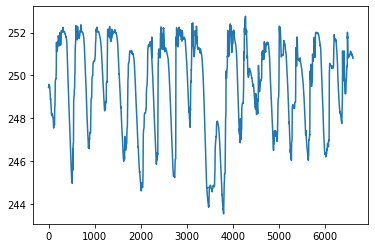

In [235]:
plt.plot(dataset)
plt.show()

In [226]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [236]:
Level = dataframe[['Lake_Level']]

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

norm_data = min_max_scaler.fit_transform(Level.values)

In [237]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [238]:
past_history = 5
future_target = 0

TRAIN_SPLIT = int(len(norm_data) * 0.7)


x_train, y_train = univariate_data(norm_data,
                                   0,
                                   TRAIN_SPLIT,
                                   past_history,
                                   future_target)

x_test, y_test = univariate_data(norm_data,
                                 TRAIN_SPLIT,
                                 None,
                                 past_history,
                                 future_target)

In [239]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout

num_units = 64
learning_rate = 0.0001
activation_function = 'sigmoid'
adam = Adam(lr=learning_rate)
loss_function = 'mse'
batch_size = 5
num_epochs = 50

# Initialize the RNN
model = Sequential()
model.add(LSTM(units = num_units, activation=activation_function, input_shape=(None, 1)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.1))
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer=adam, loss=loss_function)

In [240]:
# Using the training set to train the model
history = model.fit(
    x_train,
    y_train,
    validation_split=0.1,
    batch_size=batch_size,
    epochs=num_epochs,
    shuffle=False
)

Train on 4155 samples, validate on 462 samples
Epoch 1/50
4155/4155 [==============================] - 14s 3ms/step - loss: 0.0365 - val_loss: 0.0292
Epoch 2/50
4155/4155 [==============================] - 9s 2ms/step - loss: 0.0505 - val_loss: 0.0933
Epoch 3/50
4155/4155 [==============================] - 16s 4ms/step - loss: 0.0426 - val_loss: 0.1091
Epoch 4/50
4155/4155 [==============================] - 26s 6ms/step - loss: 0.0389 - val_loss: 0.1004
Epoch 5/50
4155/4155 [==============================] - 16s 4ms/step - loss: 0.0364 - val_loss: 0.0971
Epoch 6/50
4155/4155 [==============================] - 9s 2ms/step - loss: 0.0333 - val_loss: 0.0948
Epoch 7/50
4155/4155 [==============================] - 8s 2ms/step - loss: 0.0311 - val_loss: 0.0900
Epoch 8/50
4155/4155 [==============================] - 8s 2ms/step - loss: 0.0304 - val_loss: 0.0819
Epoch 9/50
4155/4155 [==============================] - 9s 2ms/step - loss: 0.0290 - val_loss: 0.0801
Epoch 10/50
4155/4155 [========

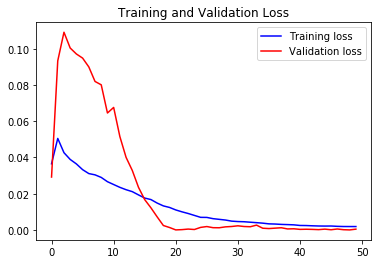

In [241]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

[]

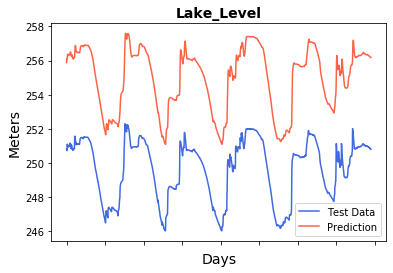

In [243]:
original = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predictions = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))

ax = sns.lineplot(x=original.index, y=original[0], label="Test Data", color='royalblue')
ax = sns.lineplot(x=predictions.index, y=predictions[0], label="Prediction", color='tomato')
ax.set_title('Lake_Level', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Meters", size = 14)
ax.set_xticklabels('', size=10)

In [ ]:

model = pm.auto_arima(train, seasonal=True, m=12)